## Import packages

In [50]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ripple_heterogeneity.utils import functions, loading
from ripple_heterogeneity.assembly import (
    assembly,
    assembly_individual_epochs,
    assembly_run,
    find_sig_assembly
)
import nelpy as nel
import nelpy.plotting as npl
import os
import pickle
import glob
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib
import random
from tqdm import tqdm
from statannotations.Annotator import Annotator
from ripple_heterogeneity.utils import add_new_deep_sup


## Plotting defaults

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'
functions.set_plotting_defaults()

## Run main analysis to detect cell assemblies inside and out of ripples

In [ ]:
df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly'
assembly_run.assembly_run(df,save_path,parallel=True)

## load data from cell_assembly

In [41]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly"

sessions = glob.glob(save_path + os.sep + "*.pkl")

sessions_df = pd.DataFrame()
sessions_df["sessions"] = sessions
not_to_use = (sessions_df["sessions"].str.contains("OMLproject", case=False)) | (
    sessions_df["sessions"].str.contains("ORproject", case=False)
)
sessions_df = sessions_df[~not_to_use]
sessions_df

UID = []
deepSuperficial = []
# deepSuperficialDistance = []
weights = []
membership = []
df = pd.DataFrame()
assembly_n = 0
assembly_ = []
basepath = []
assembly_path = []
for session in sessions_df.sessions:
    with open(session, "rb") as f:
        results = pickle.load(f)
    if len(results["patterns_inside_ripples"]) == 0:
        continue    
    (
        patterns,
        is_member_keep,
        keep_assembly,
        is_member,
    ) = find_sig_assembly.main(results["patterns_inside_ripples"])

    for i_assemblies,pattern in enumerate(patterns):
        if is_member_keep[i_assemblies].sum() < 2:
            continue
        UID.append(results["UID"])
        deepSuperficial.append(results["deepSuperficial"])
        # deepSuperficialDistance.append(results["deepSuperficialDistance"])
        weights.append(pattern)
        # thres = np.mean(pattern) + np.std(pattern) * 2
        # membership.append(pattern > thres)
        membership.append(is_member_keep[i_assemblies])
        assembly_.append([assembly_n] * len(pattern))
        assembly_n += 1
        basepath.append([results["basepath"]] * len(pattern))
        assembly_path.append([session] * len(pattern))

df["UID"] = np.hstack(UID)
df["basepath"] = np.hstack(basepath)
df["deepSuperficial"] = np.hstack(deepSuperficial)
# df["deepSuperficialDistance"] = np.hstack(deepSuperficialDistance)
df["weights"] = np.hstack(weights)
df["membership"] = np.hstack(membership)
df["assembly_n"] = np.hstack(assembly_)
df["assembly_path"] = np.hstack(assembly_path)

df

,UID,basepath,deepSuperficial,weights,membership,assembly_n,assembly_path
0,1,Z:\Data\AYAold\AB1\day1,Deep,-0.068668,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
1,2,Z:\Data\AYAold\AB1\day1,Superficial,0.025379,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
2,9,Z:\Data\AYAold\AB1\day1,Deep,-0.064106,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
3,10,Z:\Data\AYAold\AB1\day1,Superficial,0.052817,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
4,12,Z:\Data\AYAold\AB1\day1,Deep,-0.157216,True,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
...,...,...,...,...,...,...,...
22179,29,Z:\Data\Kenji\nlx_070329,Deep,0.230288,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
22180,31,Z:\Data\Kenji\nlx_070329,Deep,0.109466,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
22181,32,Z:\Data\Kenji\nlx_070329,Deep,0.540758,True,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...
22182,35,Z:\Data\Kenji\nlx_070329,Deep,-0.027182,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...


In [5]:
results.keys()

dict_keys(['patterns_outside_ripples', 'significance_outside_ripples', 'zactmat_outside_ripples', 'patterns_inside_ripples', 'significance_inside_ripples', 'zactmat_inside_ripples', 'UID', 'basepath', 'deepSuperficial'])

### add updated deep/sup

In [42]:
df = add_new_deep_sup.add_new_deep_sup_class(df)
df

,UID,basepath,deepSuperficial,weights,membership,assembly_n,assembly_path,deepSuperficialDistance,brainRegion
0,1,Z:\Data\AYAold\AB1\day1,Deep,-0.068668,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-178.457275,CA1so
1,2,Z:\Data\AYAold\AB1\day1,Superficial,0.025379,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,171.542725,CA1sr
2,9,Z:\Data\AYAold\AB1\day1,middle,-0.064106,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-28.457275,CA1so
3,10,Z:\Data\AYAold\AB1\day1,Superficial,0.052817,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,121.542725,CA1sr
4,12,Z:\Data\AYAold\AB1\day1,middle,-0.157216,True,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-28.457275,CA1so
...,...,...,...,...,...,...,...,...,...
22179,29,Z:\Data\Kenji\nlx_070329,Deep,0.230288,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-157.133059,CA1
22180,31,Z:\Data\Kenji\nlx_070329,Deep,0.109466,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-155.520833,CA1
22181,32,Z:\Data\Kenji\nlx_070329,Deep,0.540758,True,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-175.520833,CA1
22182,35,Z:\Data\Kenji\nlx_070329,Deep,-0.027182,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-103.809873,CA1


### add rem shifting

In [8]:
# import add_rem_shift
# df = add_rem_shift.add_rem_shift(df)

D:\github\ripple_heterogeneity\python\loading.py:494: UserWarning: file does not exist
D:\github\ripple_heterogeneity\python\loading.py:494: UserWarning: file does not exist
D:\github\ripple_heterogeneity\python\loading.py:494: UserWarning: file does not exist


In [43]:
print('n sessions',df.basepath.nunique())
print('n assemblies',df.assembly_n.nunique())
print('')
print('n deep units',(df.deepSuperficial == 'Deep').sum())
print('n sup units',(df.deepSuperficial == 'Superficial').sum())
print('')
# print('n deep rem shift units',(df.layer_rem_shift == 'deep_rem_shift').sum())
# print('n sup non-rem shift units',(df.layer_rem_shift == 'sup_non_rem_shift').sum())
print('')
print('n deep members',((df.deepSuperficial == 'Deep') & df.membership).sum())
print('n sup members',((df.deepSuperficial == 'Superficial') & df.membership).sum())
print('')
# print('n deep rem shift members',((df.layer_rem_shift == 'deep_rem_shift') & df.membership).sum())
# print('n sup non-rem shift members',((df.layer_rem_shift == 'sup_non_rem_shift') & df.membership).sum())

n sessions 150
n assemblies 436

n deep units 11143
n sup units 3570


n deep members 1217
n sup members 362



In [ ]:

# def shuff_labels(df,layer,n_shuff):
#     weights = []
#     for i_shuff in range(1000):
#         labels = df['deepSuperficial'].values.copy()
#         random.shuffle(labels)

#         weights_ = df[(labels == layer)].weights
#         weights.append(weights_[weights_ > 0].median())


# rel_prop = []
# GrosmarkAD_df = df[df['basepath'].str.contains("GrosmarkAD")]
# for n_as in GrosmarkAD_df.assembly_n.unique():

#     current_df = GrosmarkAD_df[GrosmarkAD_df.assembly_n == n_as]
#     n_deep = (current_df.deepSuperficial == "Deep").sum()
#     n_sup = (current_df.deepSuperficial == "Superficial").sum()

#     deep_weights_ = current_df[(current_df.deepSuperficial == "Deep")].weights
#     deep_weights.append(deep_weights_[deep_weights_ > 0].median())

#     sup_weights_ = current_df[(current_df.deepSuperficial == "Superficial")].weights
#     sup_weights.append(sup_weights_[sup_weights_ > 0].median())

#     rel_prop.append(n_deep / (n_deep+n_sup))
#     # _,p = chisquare(np.array([n_deep,n_sup]) / (n_deep+n_sup),f_exp=[.5,.5])
#     # if p < 0.05:
#     #     print(current_df.basepath.unique(), n_as,n_deep,n_sup)
# plt.hist(rel_prop,100)
# plt.show()

## get assembly identies (deep/sup)

classify assemblies by members' weights

In [44]:
import warnings
warnings.filterwarnings("ignore")

def shuff_labels(df, layer, n_shuff=100):
    weights = []
    for _ in range(n_shuff):
        labels = df["deepSuperficial"].values.copy()
        random.shuffle(labels)

        weights_ = df[(labels == layer)].weights
        weights.append(weights_[weights_ > 0].median())
    return weights


# def pvalue(shuff_dist,score):
#         return (sum(np.abs(shuff_dist) > np.abs(score)) + 1) /(len(shuff_dist) + 1)

rel_prop_deep_sup = []
prop_deep = []
prop_sup = []
basepath = []
n_deeps = []
n_sups = []
assembly_n = []
n_deep_mem = []
n_sup_mem = []
deep_weights = []
sup_weights = []
deep_rem_weights = []
sup_rem_weights = []
deep_rem_weights_shuff = []
sup_rem_weights_shuff = []
deep_weights_shuff = []
sup_weights_shuff = []
n_members = []
# p_deep = []
# p_sup = []
prop_deep_members = []
prop_sup_members = []
assembly_path = []
sup_weights_mem = []
deep_weights_mem = []
for n_as in tqdm(df.assembly_n.unique()):
    current_df = df[df.assembly_n == n_as]
    n_deep = (current_df.deepSuperficial == "Deep").sum()
    n_sup = (current_df.deepSuperficial == "Superficial").sum()

    # if (current_df.membership.sum() > 2) & (p > 0.05) & (n_deep >= 5) & (n_sup >= 5):
    # if (n_deep >= 5) & (n_sup >= 5):

    n_deep_mem.append(
        ((current_df.deepSuperficial == "Deep") & (current_df.membership)).sum()
    )
    n_sup_mem.append(
        ((current_df.deepSuperficial == "Superficial") & (current_df.membership)).sum()
    )

    deep_weights_ = current_df[(current_df.deepSuperficial == "Deep")].weights
    deep_weights.append(deep_weights_[deep_weights_ > 0].median())

    sup_weights_ = current_df[(current_df.deepSuperficial == "Superficial")].weights
    sup_weights.append(sup_weights_[sup_weights_ > 0].median())

    deep_weights_mem_ = current_df[(current_df.deepSuperficial == "Deep") & (current_df.membership)].weights
    deep_weights_mem.append(deep_weights_mem_[deep_weights_mem_ > 0].median())

    sup_weights_mem_ = current_df[(current_df.deepSuperficial == "Superficial") & (current_df.membership)].weights
    sup_weights_mem.append(sup_weights_mem_[sup_weights_mem_ > 0].median())

    deep_weights_shuff.append(shuff_labels(current_df, "Deep"))
    sup_weights_shuff.append(shuff_labels(current_df, "Superficial"))
    # p_deep.append(pvalue(shuff_labels(current_df,"Deep"),deep_weights[-1]))
    # p_sup.append(pvalue(shuff_labels(current_df,"Superficial"),sup_weights[-1]))

    # layer / rem-shift
    # deep_weights_ = current_df[(current_df.layer_rem_shift == "deep_rem_shift")].weights
    # deep_rem_weights.append(deep_weights_[deep_weights_ > 0].median())

    # sup_weights_ = current_df[(current_df.layer_rem_shift == "sup_non_rem_shift")].weights
    # sup_rem_weights.append(sup_weights_[sup_weights_ > 0].median())

    # layer / rem-shift shuffle labels
    # deep_rem_weights_shuff.append(shuff_labels(current_df,"deep_rem_shift"))
    # sup_rem_weights_shuff.append(shuff_labels(current_df,"sup_non_rem_shift"))

    # p_deep.append(pvalue(shuff_labels(current_df,"Deep"),deep_weights[-1]))
    # p_sup.append(pvalue(shuff_labels(current_df,"Superficial"),sup_weights[-1]))

    rel_prop_deep_sup.append(n_deep_mem[-1] / (current_df.membership).sum())

    prop_deep_members.append(
        ((current_df.deepSuperficial == "Deep") & (current_df.membership)).sum()
        / (current_df.membership).sum()
    )
    prop_sup_members.append(
        ((current_df.deepSuperficial == "Superficial") & (current_df.membership)).sum()
        / (current_df.membership).sum()
    )

    n_members.append(current_df.membership.sum())
    prop_deep.append(
        ((current_df.deepSuperficial == "Deep")).sum() / current_df.shape[0]
    )
    prop_sup.append(
        ((current_df.deepSuperficial == "Superficial")).sum() / current_df.shape[0]
    )
    basepath.append(current_df.basepath.unique())
    assembly_path.append(current_df.assembly_path.unique())

    assembly_n.append(n_as)
    n_deeps.append(n_deep)
    n_sups.append(n_sup)

basepath = np.hstack(basepath)
assembly_path = np.hstack(assembly_path)

prop_df = pd.DataFrame()
prop_df["basepath"] = basepath
prop_df["prop_deep"] = prop_deep
prop_df["prop_sup"] = prop_sup
prop_df["rel_prop_deep_sup"] = rel_prop_deep_sup
prop_df["prop_deep_members"] = prop_deep_members
prop_df["prop_sup_members"] = prop_sup_members
prop_df["assembly_n"] = assembly_n
prop_df["n_members"] = n_members
prop_df["n_deep"] = n_deeps
prop_df["n_sup"] = n_sups
prop_df["n_deep_mem"] = n_deep_mem
prop_df["n_sup_mem"] = n_sup_mem
prop_df["deep_weights"] = deep_weights
prop_df["sup_weights"] = sup_weights
prop_df["deep_weights_mem"] = deep_weights_mem
prop_df["sup_weights_mem"] = sup_weights_mem
# prop_df['deep_rem_weights'] = deep_rem_weights
# prop_df['sup_rem_weights'] = sup_rem_weights
prop_df["assembly_path"] = assembly_path

# prop_df['p_deep'] = p_deep
# prop_df['p_sup'] = p_sup

labels = [
    "sup" if val == 1 else "deep"
    for val in np.argmax([prop_df.deep_weights, prop_df.sup_weights], axis=0)
]
prop_df["label_by_weight"] = labels

100%|██████████| 436/436 [00:42<00:00, 10.21it/s]


### deep to sup weight ratio

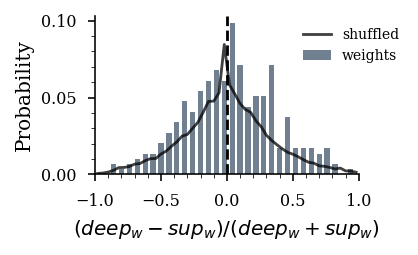

In [63]:
plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1,1)), edgecolor='k')
ratio = (prop_df.deep_weights-prop_df.sup_weights)/(prop_df.deep_weights+prop_df.sup_weights)
bin_width = .04
x = np.arange(-1,1,bin_width+bin_width/2)
binned_ratio,_ = np.histogram(ratio,bins=x)
plt.bar(x[:-1]+bin_width/2,binned_ratio/binned_ratio.sum(),width=bin_width,color="slategrey",label='weights')

plt.xlim(-1,1)
plt.axvline(0,color='k',ls='--')
plt.xlabel(r'$(deep_{w} - sup_{w}) / (deep_{w} + sup_{w})$')
plt.ylabel('Probability')

ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ratio = (np.hstack(deep_weights_shuff)-np.hstack(sup_weights_shuff))/(np.hstack(deep_weights_shuff)+np.hstack(sup_weights_shuff))
# bin_width = .01
x = np.arange(-1,1+bin_width/2,bin_width)
binned_ratio,_ = np.histogram(ratio,bins=x)
plt.plot(x[:-1]+bin_width/2,binned_ratio/binned_ratio.sum(),color="k",alpha=.75,label='shuffled')

# plt.legend(frameon=False,loc='best')
plt.legend(loc='best', bbox_to_anchor=(.7, 0., 0.5, 1),fontsize='x-small',frameon=False)

# plt.savefig(os.path.join(fig_save_path,'deep_sup_assembly_weight.svg'),dpi=300,bbox_inches='tight')


### assembly contribution

Text(0.5, 0, 'contribution to assembly')

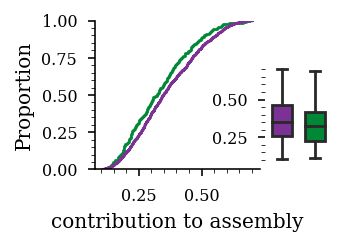

In [47]:
from ripple_heterogeneity.utils import custom_plots

df['weights_abs'] = np.abs(df['weights'])
# make pivot table with weights
# weights_df = pd.DataFrame()
# weights_df["weights"] = np.hstack([df.weights, df.weights])
# weights_df["deepSuperficial"] = np.hstack(
#     [["Deep"] * len(df.weights), ["Superficial"] * len(df.weights)]
# )

group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

fig, ax = plt.subplots(
    figsize=functions.set_size("thesis", fraction=0.25, subplots=(1.5, 1)), edgecolor=None
)
ax_box = custom_plots.plot_ecdf_box(
    data=df[df.membership],
    x="weights_abs",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    ax=ax,
    x_offset=.8,
    fig=fig
)
ax.set_xlabel("contribution to assembly")

# plt.savefig(os.path.join(fig_save_path,'contribution_to_assembly.svg'),dpi=300,bbox_inches='tight')


In [53]:
df

,UID,basepath,deepSuperficial,weights,membership,assembly_n,assembly_path,deepSuperficialDistance,brainRegion,weights_abs
0,1,Z:\Data\AYAold\AB1\day1,Deep,-0.068668,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-178.457275,CA1so,0.068668
1,2,Z:\Data\AYAold\AB1\day1,Superficial,0.025379,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,171.542725,CA1sr,0.025379
2,9,Z:\Data\AYAold\AB1\day1,middle,-0.064106,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-28.457275,CA1so,0.064106
3,10,Z:\Data\AYAold\AB1\day1,Superficial,0.052817,False,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,121.542725,CA1sr,0.052817
4,12,Z:\Data\AYAold\AB1\day1,middle,-0.157216,True,0,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-28.457275,CA1so,0.157216
...,...,...,...,...,...,...,...,...,...,...
22179,29,Z:\Data\Kenji\nlx_070329,Deep,0.230288,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-157.133059,CA1,0.230288
22180,31,Z:\Data\Kenji\nlx_070329,Deep,0.109466,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-155.520833,CA1,0.109466
22181,32,Z:\Data\Kenji\nlx_070329,Deep,0.540758,True,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-175.520833,CA1,0.540758
22182,35,Z:\Data\Kenji\nlx_070329,Deep,-0.027182,False,435,Z:\home\ryanh\projects\ripple_heterogeneity\ce...,-103.809873,CA1,0.027182


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True_Deep vs. True_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:7.234e-05 U_stat=2.505e+05


(<AxesSubplot:ylabel='assembly weight'>,
 [<statannotations.Annotation.Annotation at 0x1951bdaf130>])

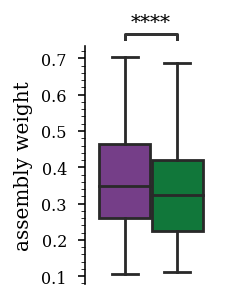

In [55]:
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

fig, ax = plt.subplots(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
sns.boxplot(
    data=df[df.membership],
    x="membership",
    y="weights_abs",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    ax=ax,
)
ax.set_ylabel("assembly weight")
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel("")
plt.legend([], [], frameon=False)
sns.despine(bottom=True)

box_pairs = [
    ((True, "Deep"), (True, "Superficial")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=df[df.membership],
    x="membership",
    y="weights_abs",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
)

annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()
# plt.savefig(os.path.join(fig_save_path,'contribution_to_assembly.svg'),dpi=300,bbox_inches='tight')


In [19]:
print('n sessions',prop_df.basepath.nunique())
# print('n sessions',prop_df.basepath.unique())

print('n assemblies',prop_df.basepath.shape[0])

n_deep = []
n_sup = []
n_deep_mem = []
n_sup_mem = []

for basepath in prop_df.basepath:
    n_deep.append(prop_df[prop_df.basepath == basepath].n_deep.iloc[0])
    n_sup.append(prop_df[prop_df.basepath == basepath].n_sup.iloc[0])
    n_deep_mem.append(prop_df[prop_df.basepath == basepath].n_deep_mem.sum())
    n_sup_mem.append(prop_df[prop_df.basepath == basepath].n_sup_mem.sum())

print('n deep units ',sum(n_deep))
print('n sup units ',sum(n_sup))

print('n deep members ',sum(n_deep_mem))
print('n sup members ',sum(n_sup_mem))

n sessions 150
n assemblies 436
n deep units  11143
n sup units  3570
n deep members  6885
n sup members  1515


### prop of mixed assemblies

[None, None, None, None]

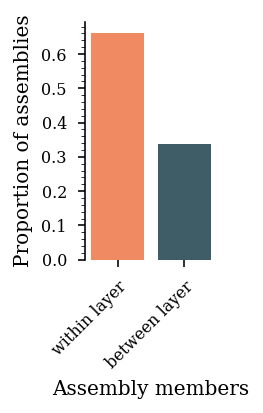

In [20]:
mixed = 0
deep_biased = 0
sup_biased = 0

for n_as in df.assembly_n.unique():
    current_df = df[df.assembly_n == n_as]
    mem_idx = current_df.membership == True
    sup_idx = current_df.deepSuperficial == "Superficial"
    deep_idx = current_df.deepSuperficial == "Deep"

    if ((deep_idx & mem_idx).sum() > 0) & ((sup_idx & mem_idx).sum() > 0):
        mixed += 1
    elif ((deep_idx & mem_idx).sum() > 1) & ((sup_idx & mem_idx).sum() == 0):
        deep_biased += 1
    elif ((deep_idx & mem_idx).sum() == 0) & ((sup_idx & mem_idx).sum() > 0):
        sup_biased += 1

# labels = ["all deep", "mixed", "all sup"]
# counts = [deep_biased, mixed, sup_biased]
labels = ["within layer", "between layer"]
counts = [deep_biased + sup_biased, mixed]


fig, ax = plt.subplots(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)

group_colors = {"same_layer": '#ef8a62',
            'cross_layer': '#3e5d66'}

# colors = ["#7b3294", "slategrey", "#008837"]
# Horizontal Bar Plot
ax.bar(labels, np.array(counts) / sum(counts), color=group_colors.values())

# Remove axes splines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

# Add padding between axes and labels
# ax.xaxis.set_tick_params(pad=5)
# ax.yaxis.set_tick_params(pad=10)

# Show top values
# ax.invert_yaxis()

# Add annotation to bars
# for i in ax.patches:
#     plt.text(
#         i.get_width() - 0.15,
#         i.get_y() + 0.5,
#         str(round((i.get_width()), 2)),
#         fontsize=6,
#         fontweight="bold",
#         color="w",
#         zorder=100,
#     )

ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel("Proportion of assemblies")
ax.set_xlabel("Assembly members")

sns.despine(bottom=True)
# ax.set_xticklabels(rotation=45)
# rotate x labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# plt.savefig(os.path.join(fig_save_path,'assembly_unit_id.svg'),dpi=300,bbox_inches='tight')


In [25]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array(counts)
nobs = np.array([sum(counts), sum(counts)])
stat, pval = proportions_ztest(count, nobs)
stat, pval

(8.986064433619868, 2.5624178403036096e-19)

In [80]:
# all_sup = prop_df.prop_sup_members == 1
# all_deep = prop_df.prop_deep_members == 1
# mixed_bias_sup = prop_df.prop_sup_members > prop_df.prop_deep_members
# mixed_bias_deep = prop_df.prop_sup_members < prop_df.prop_deep_members
# mixed_no_bias = prop_df.prop_deep_members == prop_df.prop_sup_members

# labels = [
#     "all Superficial",
#     "mixed, bias Superficial",
#     "mixed, no bias",
#     "mixed, bias Deep",
#     "all Deep",
# ]
# counts = [
#     all_sup.sum(),
#     mixed_bias_sup.sum(),
#     mixed_no_bias.sum(),
#     mixed_bias_deep.sum(),
#     all_deep.sum(),
# ]

# fig, ax = plt.subplots(
#     figsize=functions.set_size("thesis", fraction=0.25, subplots=(1.75, 1)), edgecolor=None
# )
# cmap = matplotlib.cm.get_cmap('PRGn',5)
# colors = [cmap(i) for i in range(5)]
# colors[2] = "slategrey"

# # Horizontal Bar Plot
# ax.barh(labels, counts / sum(counts), color=colors)

# # Remove axes splines
# for s in ["top", "right"]:
#     ax.spines[s].set_visible(False)

# # Add padding between axes and labels
# ax.xaxis.set_tick_params(pad=5)
# ax.yaxis.set_tick_params(pad=10)

# # Show top values
# ax.invert_yaxis()

# # Add annotation to bars
# for i in ax.patches:
#     plt.text(
#         i.get_width() - 0.08,
#         i.get_y() + 0.5,
#         str(round((i.get_width()), 2)),
#         fontsize=6,
#         fontweight="bold",
#         color="w",
#         zorder=100,
#     )

# ax.xaxis.set_minor_locator(AutoMinorLocator())

# ax.set_xlabel("Proportion of assemblies")
# ax.set_ylabel("Assembly members")

# plt.savefig(os.path.join(fig_save_path,'assembly_unit_id.svg'),dpi=300,bbox_inches='tight')


## Example figures

show lolipop fig, assembly strengths, raster, and lfp

In [30]:
basepath = "Z:\Data\AYAold\AB1\day1"
cell_metrics, data, ripples, fs_dat = assembly_run.load_basic_data(basepath)

restrict_idx = (
    (cell_metrics.putativeCellType == "Pyramidal Cell")
    & (cell_metrics.brainRegion.str.contains("CA1"))
    & (cell_metrics.bad_unit == False)
)

# restrict cell metrics
cell_metrics = cell_metrics[restrict_idx]

ripple_epochs = nel.EpochArray([np.array([ripples.start, ripples.stop]).T])
st_unit = nel.SpikeTrainArray(
    timestamps=np.array(data["spikes"], dtype=object)[restrict_idx], fs=fs_dat
)
# behavioral_epochs = nel.EpochArray([np.array([data['epochs'].startTime,
#                                                 data['epochs'].stopTime]).T])

filename = glob.glob(os.path.join(basepath, "*.lfp"))[0]
nChannels, fs, fs_dat, shank_to_channel = functions.loadXML(basepath)

rip_ch = ripples.ripple_channel.unique()[0]
for sh in shank_to_channel:
    if np.any(shank_to_channel[sh] == rip_ch):
        shank = sh
        break

channel_idx = np.where(shank_to_channel[shank] == rip_ch)[0][0]

lfp, ts = loading.loadLFP(
    filename,
    n_channels=nChannels,
    channel=shank_to_channel[shank],
    frequency=fs,
    precision="int16",
)
lfp_obj = nel.AnalogSignalArray(data=lfp.T, fs=fs)


In [31]:
session = 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\cell_assembly_v1\\Z__Data_AYAold_AB1_day1.pkl'
with open(session, 'rb') as f:
    results = pickle.load(f)

z_mat,ts = assembly_run.get_z_t(st_unit)
assemblyAct = assembly.computeAssemblyActivity(results['patterns_inside_ripples'], z_mat)
assembly_act = nel.AnalogSignalArray(data=assemblyAct,timestamps=ts,fs=1000)

In [34]:
# st_unit.get_event_firing_order()
# rip = 9
n_deep = []
n_sup = []

for rip in ripple_epochs:
    idx = st_unit[rip].n_events > 0
    if type(idx) != type(True):
        n_deep.append(sum(cell_metrics.deepSuperficial[idx] == 'Deep'))
        n_sup.append(sum(cell_metrics.deepSuperficial[idx] == 'Superficial'))
    else:
        n_deep.append(np.nan)
        n_sup.append(np.nan)

In [35]:
# n_supn_sup == 0
np.argsort((np.array(n_deep)-np.array(n_sup)))[:20]
# print([n_deep/n_sup])

# print(n_deep[587],n_sup[587])

array([ 508,  156, 1358, 1138, 1109,  858,   69,  361,  404,  894,  341,
        912,  705, 1320,   31,  637,  781, 1414,  492, 1158], dtype=int64)

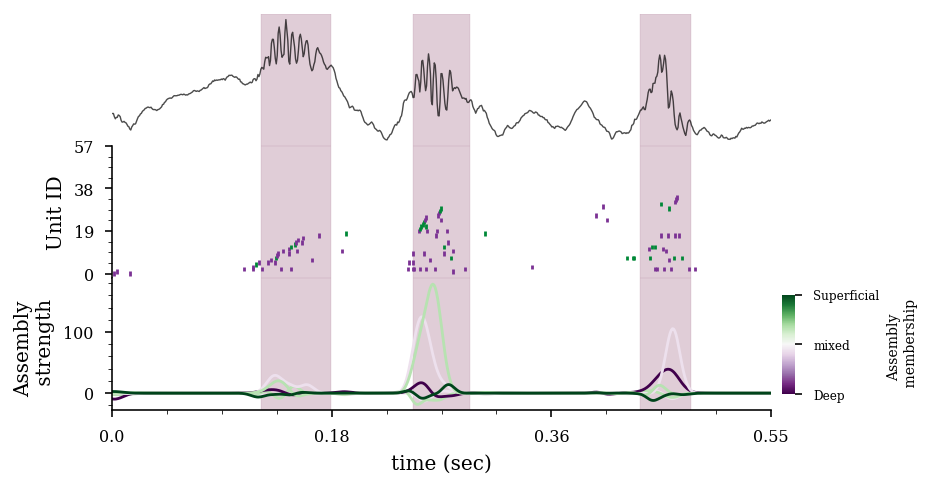

In [41]:
# from neurodsp.filt import filter_signal
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(3,1, figsize=functions.set_size('thesis', fraction=1, subplots=(1.5,1.5)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.2)
axs = axs.ravel()

# rip = 9
rip = 1358
rip = 71

window = .5
plotting_epoch = nel.EpochArray([np.array([ripple_epochs[rip].start-window/2,ripple_epochs[rip].stop+window/2]).T])

# Define a frequency range to filter the data
f_range = (100, 250)
# Bandpass filter the data, across the band of interest
# sig_filt = filter_signal(lfp_obj[plotting_epoch].data[channel_idx], fs, 'bandpass', f_range)
axs[0].plot(lfp_obj[plotting_epoch]._abscissa_vals,lfp_obj[plotting_epoch].data[channel_idx],
            color='k',alpha=.7,linewidth=.7,label='ripple bandpass filtered')

# sort by deepSuperficial
colors1 = np.array(['#7b3294']*cell_metrics.shape[0])
colors1[cell_metrics.deepSuperficial == "Superficial"] = '#008837'
sort_idx = np.argsort(cell_metrics['deepSuperficial'])

fr_order = np.array(st_unit[plotting_epoch].get_event_firing_order())-1
axs[1].eventplot(st_unit[plotting_epoch].data[fr_order],color=colors1[fr_order],linelengths=2)

deep_median = []
sup_median = []
for pattern in results['patterns_inside_ripples']:
    deep_median.append(np.median(pattern[(results['deepSuperficial'] == 'Deep') & (pattern > 0)]))
    sup_median.append(np.median(pattern[(results['deepSuperficial'] == 'Superficial') & (pattern > 0)]))

ratio = (np.array(sup_median) - np.array(deep_median)) / (np.array(sup_median) + np.array(deep_median))
norm = matplotlib.colors.Normalize(vmin=ratio.min(), vmax=ratio.max())
cmap = matplotlib.cm.get_cmap('PRGn')
rgba = cmap(norm(ratio))
for i,c in enumerate(rgba):
    axs[2].plot(assembly_act[plotting_epoch].abscissa_vals,assembly_act[plotting_epoch].data[i],color=c)

axins = inset_axes(axs[2],
                    width="2%",  
                    height="75%",
                    loc='right',
                    borderpad=-1.5
                   )
sm = plt.cm.ScalarMappable(cmap='PRGn', norm=plt.Normalize(vmin=-1, vmax=1))
cbar = fig.colorbar(sm, cax=axins,ticks=[-1, 0, 1])
cbar.outline.set_visible(False)
cbar.ax.set_yticklabels(['Deep', 'mixed', 'Superficial'],fontsize=6)
axins.set_ylabel('Assembly \n membership',fontsize=7)

for rip in ripple_epochs[plotting_epoch]:
    axs[0].axvspan(rip.start,rip.stop,color='grey',alpha=.25,zorder=-1000)
    axs[1].axvspan(rip.start,rip.stop,color='grey',alpha=.25,zorder=-1000)
    axs[2].axvspan(rip.start,rip.stop,color='grey',alpha=.25,zorder=-1000)

x = np.linspace(plotting_epoch.start,plotting_epoch.stop,4)
axs[2].set_xticks(x)
axs[2].set_xticklabels(np.round(x-plotting_epoch.start,2))

axs[1].set_yticks(np.linspace(0,cell_metrics.UID.unique().shape[0],4))
axs[1].set_ylim(-2,cell_metrics.UID.unique().shape[0])
axs[1].set_ylabel('Unit ID')

axs[2].set_xlabel('time (sec)')
axs[2].set_ylabel('Assembly \n strength')

for i in range(3):
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].set_xlim(plotting_epoch.start,plotting_epoch.stop)   

axs[0].axes.xaxis.set_visible(False)
axs[0].axes.yaxis.set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["bottom"].set_visible(False)
axs[0].spines["right"].set_visible(False)
axs[0].spines["left"].set_visible(False)  

axs[1].spines["bottom"].set_visible(False)

axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[2].yaxis.set_minor_locator(AutoMinorLocator())
axs[2].xaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'ripple_deep_sup_example_v2.svg'),dpi=300,bbox_inches='tight')


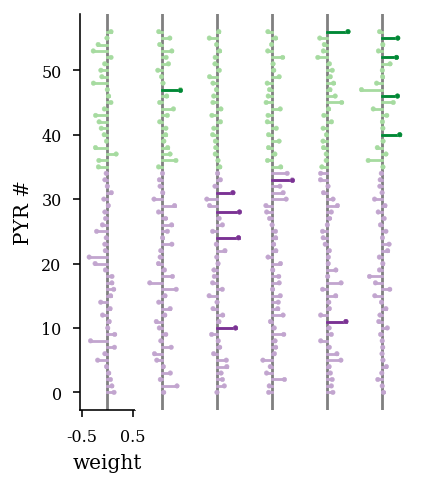

In [19]:
session = 'Z:\\home\\ryanh\\projects\\ripple_heterogeneity\\cell_assembly_v1\\Z__Data_AYAold_AB1_day1.pkl'
with open(session, 'rb') as f:
    results = pickle.load(f)

# first, sort cells by sublayer
sort_idx = np.argsort(results['deepSuperficial'])
results['deepSuperficial'] = results['deepSuperficial'].iloc[sort_idx]

patterns = results['patterns_inside_ripples']
patterns = [pat[sort_idx] for pat in patterns]
patterns = np.array(patterns)

# get colors per sub group
colors = ['#c2a5cf']* results['deepSuperficial'].shape[0]
colors = np.array(colors)
colors[results['deepSuperficial'] == 'Deep'] = ['#c2a5cf']*sum(results['deepSuperficial'] == 'Deep')
colors[results['deepSuperficial'] == 'Superficial'] = ['#a6dba0']*sum(results['deepSuperficial'] == 'Superficial')

colors_sig = ['#7b3294']* results['deepSuperficial'].shape[0]
colors_sig = np.array(colors_sig)
colors_sig[results['deepSuperficial'] == 'Deep'] = ['#7b3294']*sum(results['deepSuperficial'] == 'Deep')
colors_sig[results['deepSuperficial'] == 'Superficial'] = ['#008837']*sum(results['deepSuperficial'] == 'Superficial')


fig, axs = plt.subplots(1,patterns.shape[0], figsize=functions.set_size('thesis', fraction=.5, subplots=(patterns.shape[0], patterns.shape[0]/2)), edgecolor='k')

fig.subplots_adjust(hspace = 0.00, wspace=0)
axs = axs.ravel()

for i,assmbl in enumerate(patterns):

    axs[i].scatter(assmbl,np.arange(len(assmbl)),c=colors,zorder=1000,s=5)

    thres = np.mean(assmbl) + np.std(assmbl)*2
    idx = assmbl > thres
    axs[i].scatter(assmbl[idx],np.arange(len(assmbl))[idx],c=colors_sig[idx],zorder=1000,s=5)

    for j,item in enumerate(assmbl):
        axs[i].plot(np.sort([item,0]),[j,j],color=colors[j],zorder=-50)
        if idx[j]:
            axs[i].plot(np.sort([item,0]),[j,j],color=colors_sig[j],zorder=-50)

    axs[i].axvline(0,color='grey',zorder=-100)

    for i in range(patterns.shape[0]):
        axs[i].set_xlim(-patterns.max()-.1,patterns.max()+.1)

    for i in range(patterns.shape[0]):
        axs[i].spines["right"].set_visible(False)
        axs[i].spines["top"].set_visible(False)  

    for i in np.arange(1,patterns.shape[0]):
        axs[i].spines["left"].set_visible(False)  
        axs[i].spines["bottom"].set_visible(False)      
        axs[i].get_yaxis().set_ticks([])
        axs[i].get_xaxis().set_ticks([])

    axs[0].set_ylabel('PYR #')
    axs[0].set_xlabel('weight')
    axs[0].set_xticks([-.5,.5])
    axs[0].set_xticklabels([-.5,.5])

plt.savefig(os.path.join(fig_save_path,'assembly_weight_example.svg'),dpi=300,bbox_inches='tight')


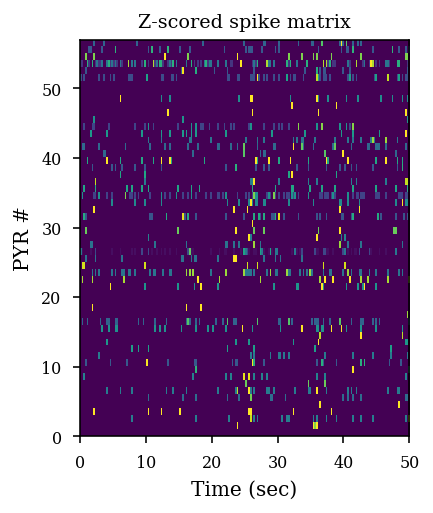

In [30]:
plt.figure(figsize=functions.set_size('thesis', fraction=.5, subplots=(patterns.shape[0], patterns.shape[0]/2)), edgecolor='k')
sort_idx = np.argsort(results['deepSuperficial'])

plt.imshow(results['zactmat_inside_ripples'][sort_idx,2500:2700],aspect='auto',interpolation='nearest',origin='lower',extent=[0,200*.25,0,patterns.shape[1]],vmax=5,vmin=0)
plt.ylabel('PYR #')
plt.xlabel('Time (sec)')
plt.title('Z-scored spike matrix')

# axs = plt.gca()
# for i, label in enumerate(('A')):
#     axs.text(-0.15, 1.2, label, transform=axs.transAxes,
#         fontsize=11, fontweight='normal', va='top', ha='right')

plt.savefig(os.path.join(fig_save_path,'assembly_zactmat_example.svg'),dpi=300,bbox_inches='tight')


## Pairwise corr of members and non members + deep/sup

In [5]:
import importlib
# import assembly_corrs_w_rem_shift
# importlib.reload(assembly_corrs_w_rem_shift)
import assembly_corrs_deep_sup
importlib.reload(assembly_corrs_deep_sup)

# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs'
# assembly_corrs.assembly_corr_run(df,save_path,parallel=False)

# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_rem_shift'
# assembly_corrs_w_rem_shift.assembly_corr_run(df,save_path,parallel=True)

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_deep_sup'
assembly_corrs_deep_sup.assembly_corr_run(df,save_path,parallel=True)

### load in saved data

In [27]:
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs'
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_rem_shift'
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_deep_sup'

corr_df = pd.DataFrame()
sessions = glob.glob(save_path +os.sep+ '*.csv')
for session in sessions:
    temp_df = pd.read_csv(session)
    corr_df = pd.concat([corr_df,temp_df],ignore_index=True)
corr_df

,Unnamed: 0,rho,label,assembly_id,basepath
0,0,-0.020359,deep,0.0,Z:\Data\AYAold\AB1\day1
1,1,0.015704,deep,0.0,Z:\Data\AYAold\AB1\day1
2,2,0.087069,deep,0.0,Z:\Data\AYAold\AB1\day1
3,3,0.006067,deep,0.0,Z:\Data\AYAold\AB1\day1
4,4,0.039665,deep,0.0,Z:\Data\AYAold\AB1\day1
...,...,...,...,...,...
2546844,2281,0.104654,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329
2546845,2282,0.118575,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329
2546846,2283,0.044208,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329
2546847,2284,0.008863,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329


In [163]:
# corr_df['r2'] = corr_df.rho**2

In [177]:
# crosscorrs = assembly_corrs.pairwise_cross_corr(st_unit.data, binsize = 0.001, nbins = 100)
# st_unit.data

In [178]:
# plt.plot(crosscorrs)
# plt.show()

Text(0, 0.5, 'Proportion of cells')

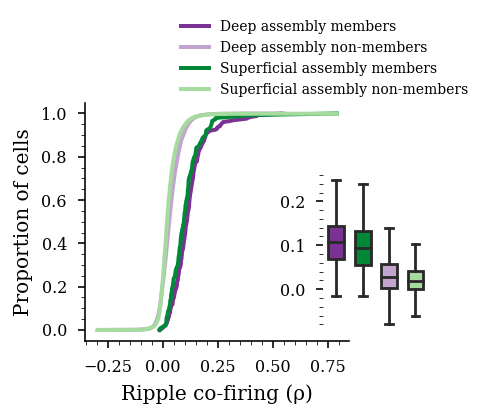

In [28]:
from ripple_heterogeneity.utils import custom_plots


group_colors = {"member_deep": '#7b3294',
            'member_sup': '#008837',
            "non_member_deep": '#c2a5cf',
            'non_member_sup': '#a6dba0'}

fig = plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1.5, 1)), edgecolor='k')

axs = plt.gca()

idx = (
    (corr_df.label == 'member_deep') |
    (corr_df.label == 'non_member_deep') |
    (corr_df.label == 'member_sup') |
    (corr_df.label == 'non_member_sup')
)

custom_plots.plot_ecdf('rho',corr_df[idx],'label','member_deep',axs,group_colors,linewidth=2,label="Deep assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','non_member_deep',axs,group_colors,linewidth=2,label="Deep assembly non-members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','member_sup',axs,group_colors,linewidth=2,label="Superficial assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','non_member_sup',axs,group_colors,linewidth=2,label="Superficial assembly non-members")

ax = custom_plots.plot_box(corr_df[idx],'label','rho',axs,fig,group_colors,x_offset=.7,showfliers=False)

axs.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 1.4),fontsize='x-small',frameon=False)

right_side = axs.spines["right"]
right_side.set_visible(False)
top_side = axs.spines["top"]
top_side.set_visible(False)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())

axs.set_xlabel('Ripple co-firing (ρ)')
axs.set_ylabel('Proportion of cells')

# plt.savefig(os.path.join(fig_save_path,'assembly_member_correlation.svg'),dpi=300,bbox_inches='tight')

In [9]:
corr_df[idx].label.unique()

array(['member_sup', 'non_member_deep', 'non_member_sup', 'member_deep'],
      dtype=object)

In [29]:
val = list(group_colors.keys())
val

['member_deep', 'member_sup', 'non_member_deep', 'non_member_sup']

Text(0, 0.5, 'Proportion of cells')

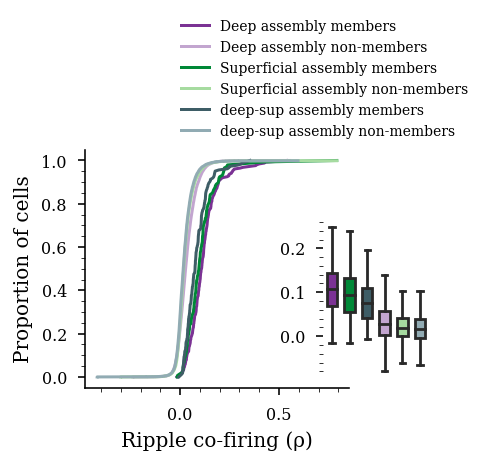

In [30]:

group_colors = {"member_deep": '#7b3294',
            'member_sup': '#008837',
            "member_deep_sup": '#3e5d66',
            "non_member_deep": '#c2a5cf',
            'non_member_sup': '#a6dba0',
            "non_member_deep_sup": '#91abb3'}

fig = plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1.5, 1)), edgecolor='k')

axs = plt.gca()

idx = (
    (corr_df.label == 'member_deep') |
    (corr_df.label == 'non_member_deep') |
    (corr_df.label == 'member_sup') |
    (corr_df.label == 'non_member_sup') |
    (corr_df.label == 'member_deep_sup') |
    (corr_df.label == 'non_member_deep_sup')
)

custom_plots.plot_ecdf('rho',corr_df[idx],'label','member_deep',axs,group_colors,linewidth=1.5,label="Deep assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','non_member_deep',axs,group_colors,linewidth=1.5,label="Deep assembly non-members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','member_sup',axs,group_colors,linewidth=1.5,label="Superficial assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','non_member_sup',axs,group_colors,linewidth=1.5,label="Superficial assembly non-members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','member_deep_sup',axs,group_colors,linewidth=1.5,label="deep-sup assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','non_member_deep_sup',axs,group_colors,linewidth=1.5,label="deep-sup assembly non-members")

ax = custom_plots.plot_box(corr_df[idx],'label','rho',axs,fig,group_colors,x_offset=.7,showfliers=False)

axs.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 1.6),fontsize='x-small',frameon=False)

right_side = axs.spines["right"]
right_side.set_visible(False)
top_side = axs.spines["top"]
top_side.set_visible(False)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())

axs.set_xlabel('Ripple co-firing (ρ)')
axs.set_ylabel('Proportion of cells')

# plt.savefig(os.path.join(fig_save_path,'assembly_member_correlation.svg'),dpi=300,bbox_inches='tight')

## add factors

In [31]:
# for i,basepath in enumerate(corr_df.basepath):
idx = (
    (corr_df.label == 'non_member_deep') |
    (corr_df.label == 'non_member_sup') |
    (corr_df.label == 'non_member_deep_sup')
)
corr_df['membership'] = 'member'
corr_df.loc[idx,'membership']  ='non_member'
corr_df

,Unnamed: 0,rho,label,assembly_id,basepath,membership
0,0,-0.020359,deep,0.0,Z:\Data\AYAold\AB1\day1,member
1,1,0.015704,deep,0.0,Z:\Data\AYAold\AB1\day1,member
2,2,0.087069,deep,0.0,Z:\Data\AYAold\AB1\day1,member
3,3,0.006067,deep,0.0,Z:\Data\AYAold\AB1\day1,member
4,4,0.039665,deep,0.0,Z:\Data\AYAold\AB1\day1,member
...,...,...,...,...,...,...
2546844,2281,0.104654,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member
2546845,2282,0.118575,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member
2546846,2283,0.044208,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member
2546847,2284,0.008863,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member


In [32]:
# importlib.reload(loading)
corr_df['name'] = 'unknown'
for basepath in corr_df.basepath.unique():
    corr_df.loc[corr_df.basepath == basepath,'name'] = loading.get_animal_id(basepath)
corr_df

,Unnamed: 0,rho,label,assembly_id,basepath,membership,name
0,0,-0.020359,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1
1,1,0.015704,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1
2,2,0.087069,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1
3,3,0.006067,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1
4,4,0.039665,deep,0.0,Z:\Data\AYAold\AB1\day1,member,AB1
...,...,...,...,...,...,...,...
2546844,2281,0.104654,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx
2546845,2282,0.118575,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx
2546846,2283,0.044208,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx
2546847,2284,0.008863,non_member_deep,736.0,Z:\Data\Kenji\nlx_070329,non_member,nlx


In [34]:
idx = (
    (corr_df.label == 'member_deep') |
    (corr_df.label == 'non_member_deep') |
    (corr_df.label == 'member_sup') |
    (corr_df.label == 'non_member_sup') |
    (corr_df.label == 'member_deep_sup') |
    (corr_df.label == 'non_member_deep_sup')
)
bad_idx = np.isnan(corr_df[idx].rho) | np.isinf(corr_df[idx].rho)

data = corr_df[idx & ~bad_idx]
os.mkdir(r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_deep_sup\results')
data.to_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_unit_corrs_deep_sup\results\df.csv')

In [35]:
# corr_df.label.unique()
corr_df['label_2'] = 'unknown'
idx = (corr_df.label == 'member_deep') | (corr_df.label == 'member_sup')
corr_df.loc[idx,'label_2'] = 'member_same_layer'

idx = (corr_df.label == 'member_deep_sup')
corr_df.loc[idx,'label_2'] = 'member_cross_layer'

idx = (corr_df.label == 'non_member_deep') | (corr_df.label == 'non_member_sup') | (corr_df.label == 'non_member_deep_sup') 
corr_df.loc[idx,'label_2'] = 'non_member'

In [36]:
corr_df.label_2.unique()

array(['unknown', 'member_same_layer', 'non_member', 'member_cross_layer'],
      dtype=object)

Text(0, 0.5, 'Proportion of cells')

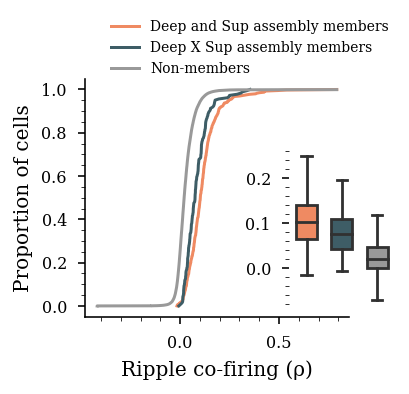

In [37]:
# group_colors = {"member_deep": '#7b3294',
#             'member_sup': '#008837',
#             "member_deep_sup": '#3e5d66',
#             "non_member_deep": '#c2a5cf',
#             'non_member_sup': '#a6dba0',
#             "non_member_deep_sup": '#91abb3'}

group_colors = {"member_same_layer": '#ef8a62',
            'member_cross_layer': '#3e5d66',
            "non_member": '#999999'}


fig = plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1.5, 1)), edgecolor='k')

axs = plt.gca()

idx = (
    (corr_df.label == 'member_deep') |
    (corr_df.label == 'non_member_deep') |
    (corr_df.label == 'member_sup') |
    (corr_df.label == 'non_member_sup') |
    (corr_df.label == 'member_deep_sup') |
    (corr_df.label == 'non_member_deep_sup')
)

custom_plots.plot_ecdf('rho',corr_df[idx],'label_2','member_same_layer',axs,group_colors,linewidth=1.5,label="Deep and Sup assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label_2','member_cross_layer',axs,group_colors,linewidth=1.5,label="Deep X Sup assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label_2','non_member',axs,group_colors,linewidth=1.5,label="Non-members")


ax = custom_plots.plot_box(corr_df[idx],'label_2','rho',axs,fig,group_colors,x_offset=.6,showfliers=False)

axs.legend(loc='best', bbox_to_anchor=(.7, -.3, 0.5, 1.6),fontsize='x-small',frameon=False)

right_side = axs.spines["right"]
right_side.set_visible(False)
top_side = axs.spines["top"]
top_side.set_visible(False)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())

axs.set_xlabel('Ripple co-firing (ρ)')
axs.set_ylabel('Proportion of cells')

# plt.savefig(os.path.join(fig_save_path,'assembly_member_correlation.svg'),dpi=300,bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

member_cross_layer v.s. non_member: t-test independent samples with Bonferroni correction, P_val=6.029e-74 stat=1.823e+01
member_same_layer v.s. member_cross_layer: t-test independent samples with Bonferroni correction, P_val=7.008e-05 stat=4.170e+00


(<AxesSubplot:xlabel='label_2', ylabel='SWR co-firing (r)'>,
  <statannot.StatResult.StatResult at 0x19519b7a250>])

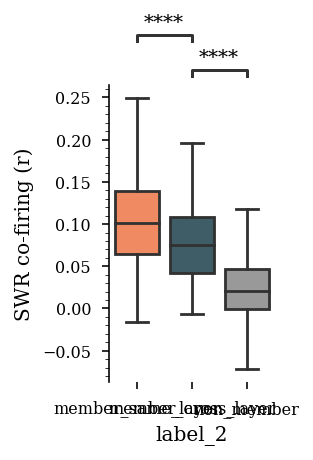

In [38]:
from statannot import add_stat_annotation

w, h = functions.set_size("thesis", fraction=0.25, subplots=(3, 1))
fig = plt.figure(figsize=(w, h), edgecolor=None)

sns.boxplot(
    y="rho", x="label_2", order=group_colors.keys(), data=corr_df[idx], showfliers=False, saturation=1
)
sns.despine(bottom=True)
ax = plt.gca()
ax.set_ylabel('SWR co-firing (r)')

ax.yaxis.set_minor_locator(AutoMinorLocator())
box_pairs = [
    ("member_cross_layer", "non_member"),
    ("member_same_layer", "member_cross_layer"),
]
add_stat_annotation(
    plt.gca(),
    data=corr_df[idx],
    y="rho",
    x="label_2",
    order=group_colors.keys(),
    box_pairs=box_pairs,
    test="t-test_ind",
    text_format="star",
    loc="outside",
    verbose=2,
)
# plt.savefig(os.path.join(fig_save_path,'assembly_member_correlation_box.svg'),dpi=300,bbox_inches='tight')



Text(0, 0.5, 'Proportion of cells')

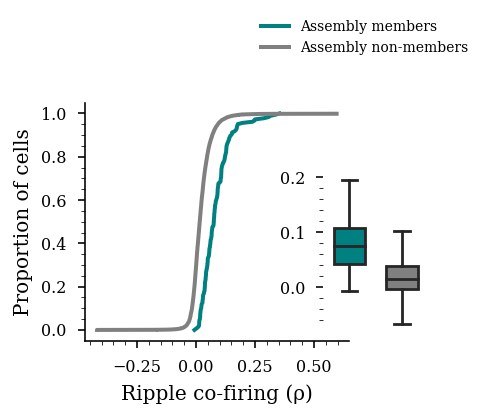

In [32]:
group_colors = {"member_deep_sup": 'teal',
            "non_member_deep_sup": 'grey'}

fig = plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1.5, 1)), edgecolor='k')

axs = plt.gca()

idx = (
    (corr_df.label == 'member_deep_sup') |
    (corr_df.label == 'non_member_deep_sup')
)

custom_plots.plot_ecdf('rho',corr_df[idx],'label','member_deep_sup',axs,group_colors,linewidth=2,label="Assembly members")
custom_plots.plot_ecdf('rho',corr_df[idx],'label','non_member_deep_sup',axs,group_colors,linewidth=2,label="Assembly non-members")

ax = custom_plots.plot_box(corr_df[idx],'label','rho',axs,fig,group_colors,x_offset=.7,showfliers=False)

axs.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 1.4),fontsize='x-small',frameon=False)

right_side = axs.spines["right"]
right_side.set_visible(False)
top_side = axs.spines["top"]
top_side.set_visible(False)
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())

axs.set_xlabel('Ripple co-firing (ρ)')
axs.set_ylabel('Proportion of cells')

# plt.savefig(os.path.join(fig_save_path,'assembly_member_correlation.svg'),dpi=300,bbox_inches='tight')

## Make pre/task/post assembly activation strength for GrosmarkAD sessions

Main analysis was moved to assembly_pre_task_post.ipynb

In [50]:
import importlib
import assembly_activation
importlib.reload(assembly_activation)
importlib.reload(loading)

save_path_assembly = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly'
sessions = glob.glob(save_path_assembly +os.sep+ '*.pkl')
sessions = [string for string in sessions if 'GrosmarkAD' in string]

basepath = []
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    basepath.append(results['basepath'])

temp_df = pd.DataFrame()
temp_df['basepath'] = basepath    

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_activation'

assembly_activation.assembly_run_activation(temp_df,save_path,save_path_assembly,parallel=False)

Z:\Data\GrosmarkAD\Achilles\Achilles_10252013
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013


## discover assemblies on each epoch seperatly

In [5]:
import importlib
import assembly_individual_epochs
importlib.reload(assembly_individual_epochs)

df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df[df.basepath.str.contains('GrosmarkAD')]

# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_5ms'
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_10ms'
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_40ms'

assembly_individual_epochs.assembly_run(df,save_path,parallel=True)

### n assemblies over epochs

In [51]:
def load_assem_epoch_data(save_path):

    sessions = glob.glob(save_path +os.sep+ '*.pkl')

    assem_epoch_df = pd.DataFrame()

    for session in sessions:
        assem_epoch_df_temp = pd.DataFrame()
        prob_sig_member = []
        n_members = []
        n_assemblies = []
        n_cells = []
        epoch = []
        with open(session, 'rb') as f:
            results = pickle.load(f)

            for i,pattern_ep in enumerate(results['patterns']):
                patterns_keep,is_member_keep,keep_assembly,is_member = functions.find_sig_assemblies(pattern_ep)
                prob_sig_member.append(np.mean(is_member_keep))
                n_members.append(is_member_keep.sum())
                n_assemblies.append(patterns_keep.shape[0])
                n_cells.append(patterns_keep.shape[1])
                epoch.append(str(i))
                
            assem_epoch_df_temp['prob_sig_member'] = prob_sig_member
            assem_epoch_df_temp['n_members'] = n_members
            assem_epoch_df_temp['n_assemblies'] = n_assemblies
            assem_epoch_df_temp['n_cells'] = n_cells
            assem_epoch_df_temp['epoch'] = epoch
            assem_epoch_df_temp['basepath'] = results['basepath']
        
        assem_epoch_df = assem_epoch_df.append(assem_epoch_df_temp,ignore_index=True)

    return assem_epoch_df

assem_epoch_df = pd.DataFrame()

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_5ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '5ms'
assem_epoch_df = assem_epoch_df.append(assem_epoch_df_temp,ignore_index=True)

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_10ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '10ms'
assem_epoch_df = assem_epoch_df.append(assem_epoch_df_temp,ignore_index=True)

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_20ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '20ms'
assem_epoch_df = assem_epoch_df.append(assem_epoch_df_temp,ignore_index=True)

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_40ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '40ms'
assem_epoch_df = assem_epoch_df.append(assem_epoch_df_temp,ignore_index=True)

In [52]:
assem_epoch_df['normalized_nassemb'] = assem_epoch_df.n_assemblies / assem_epoch_df.n_cells

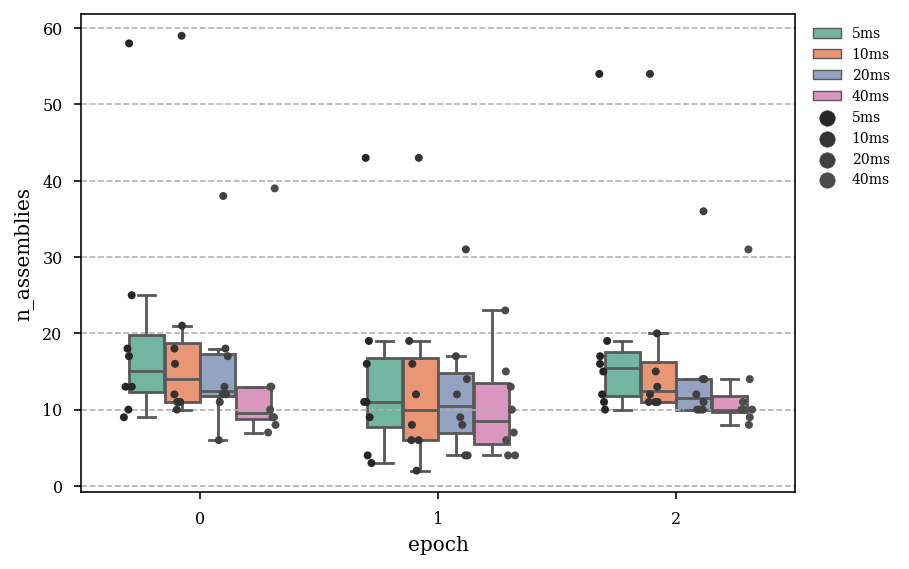

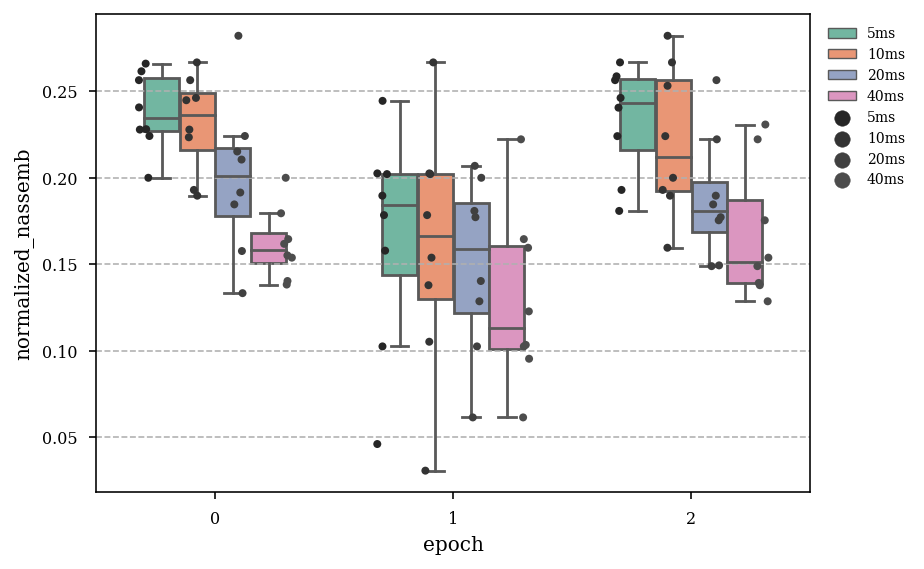

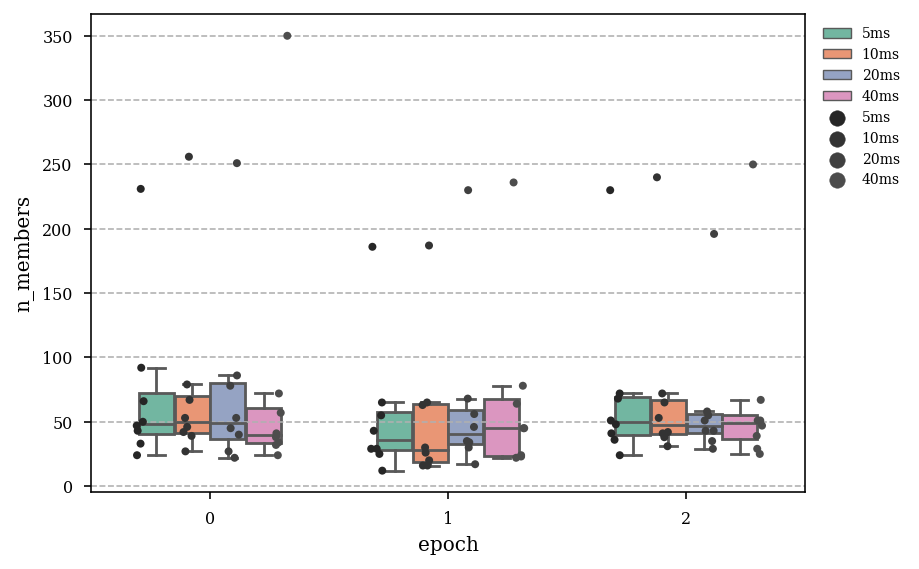

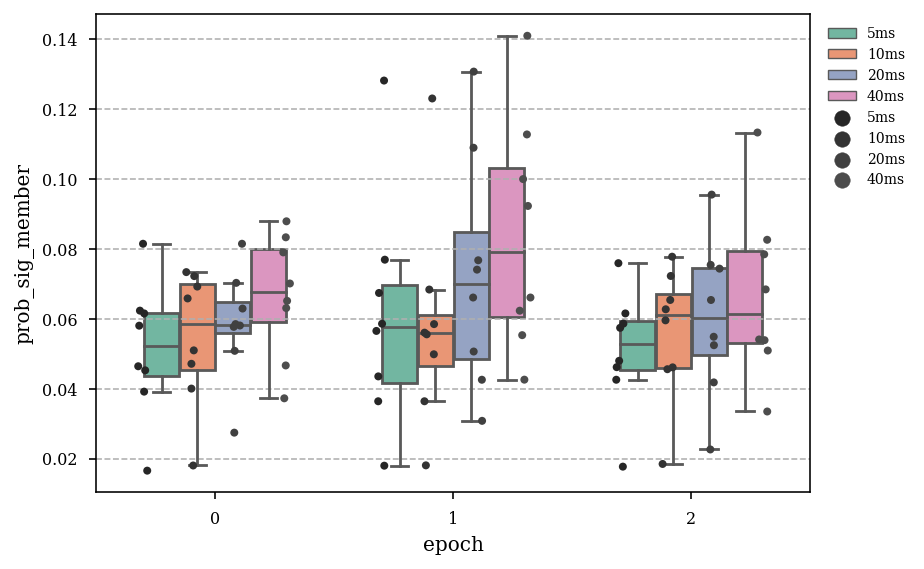

In [53]:
plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="n_assemblies", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="n_assemblies",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)


plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="normalized_nassemb", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="normalized_nassemb",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)

plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="n_members", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="n_members",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)

plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="prob_sig_member", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="prob_sig_member",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)

## plot assembly activation strength by overall participation prob. over ripples 

See if, during the novel environment exploration, the first assemblies that appear are the ones formed by high-participation cells as well

of sig members, find mean/median/range/std participation prob per assembly

for assembly strength over time, locate any peak $R >= 5$.

In [55]:
with open(sessions[0], 'rb') as f:
    results = pickle.load(f)

Text(0.5, 0, 'assemblies')

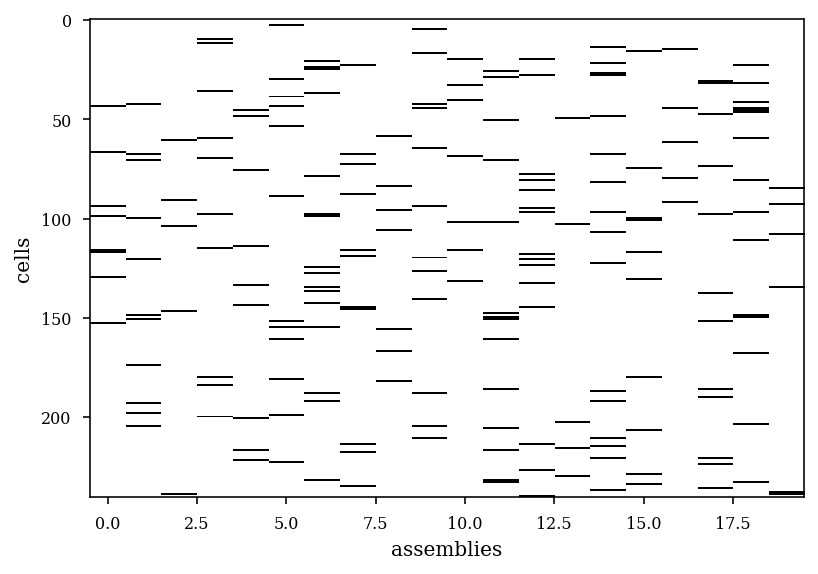

In [56]:
patterns_keep,is_member_keep,keep_idx,is_member = functions.find_sig_assemblies(results['patterns_inside_ripples'])

plt.imshow(is_member_keep.T,cmap='bone_r',aspect='auto',interpolation='nearest')
plt.ylabel('cells')
plt.xlabel('assemblies')

### fetch ripple stability data with participation per epoch/state

In [57]:
def load_in_everything(save_path):
    
    sessions = glob.glob(save_path + os.sep + '*.csv')
    
    results = pd.DataFrame()
    
    for session in sessions:
        df1 = pd.read_csv(session)
        results = results.append(df1,ignore_index=True)
    return results

# load data from savepath
df = load_in_everything(r'Z:\home\ryanh\projects\ripple_heterogeneity\ripple_stability')
df = df[df.basepath.str.contains('GrosmarkAD')]


In [58]:
import importlib
import functions
importlib.reload(functions)

def get_partic_assembl_strength(results,df):

    patterns = results['patterns_inside_ripples']
    patterns_keep,is_member_keep,keep_idx,is_member = functions.find_sig_assemblies(patterns)

    participation_prob_pre_nrem = []
    participation_prob_task_wake = []
    participation_prob_post_nrem = []
    assembl_strength = []
    assembl_strength_pre = []
    assembl_strength_task = []
    assembl_strength_post = []

    for epoch_assembly_act in results['assembly_act_inside_ripples']:
        curr_assembl = epoch_assembly_act.data[keep_idx,:]

        curr_assembl[curr_assembl < 5] = np.nan
        assembl_strength.append(np.nanmedian(curr_assembl,axis=1))

    basepath_idx = df.basepath == results['basepath']
    for i,assembly_ in enumerate(is_member_keep):
        participation_prob_pre_nrem.append(df[basepath_idx & (df.epoch_n == 0)].participation_prob_nrem[assembly_].values)
        participation_prob_task_wake.append(df[basepath_idx & (df.epoch_n == 1)].participation_prob_wake[assembly_].values)
        participation_prob_post_nrem.append(df[basepath_idx & (df.epoch_n == 2)].participation_prob_nrem[assembly_].values)

        assembl_strength_pre.append([assembl_strength[0][i]]*len(participation_prob_pre_nrem[-1]))
        assembl_strength_task.append([assembl_strength[1][i]]*len(participation_prob_task_wake[-1]))
        assembl_strength_post.append([assembl_strength[2][i]]*len(participation_prob_post_nrem[-1]))

    par_assem_df = pd.DataFrame()
    par_assem_df['participation'] = np.concatenate([np.hstack(participation_prob_pre_nrem),
                                                    np.hstack(participation_prob_task_wake),
                                                    np.hstack(participation_prob_post_nrem)])

    par_assem_df['assembl_strength'] = np.concatenate([np.hstack(assembl_strength_pre),
                                                        np.hstack(assembl_strength_task),
                                                        np.hstack(assembl_strength_post)])

    par_assem_df['epoch'] = np.concatenate([['pre']*len(np.hstack(participation_prob_pre_nrem)),
                                            ['task']*len(np.hstack(participation_prob_task_wake)),
                                            ['post']*len(np.hstack(participation_prob_post_nrem))])

    par_assem_df['basepath'] = results['basepath']
    return par_assem_df

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_activation'

sessions = glob.glob(save_path +os.sep+ '*.pkl')

par_assem_df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    temp_df = get_partic_assembl_strength(results,df)
    par_assem_df = par_assem_df.append(temp_df,ignore_index=True)

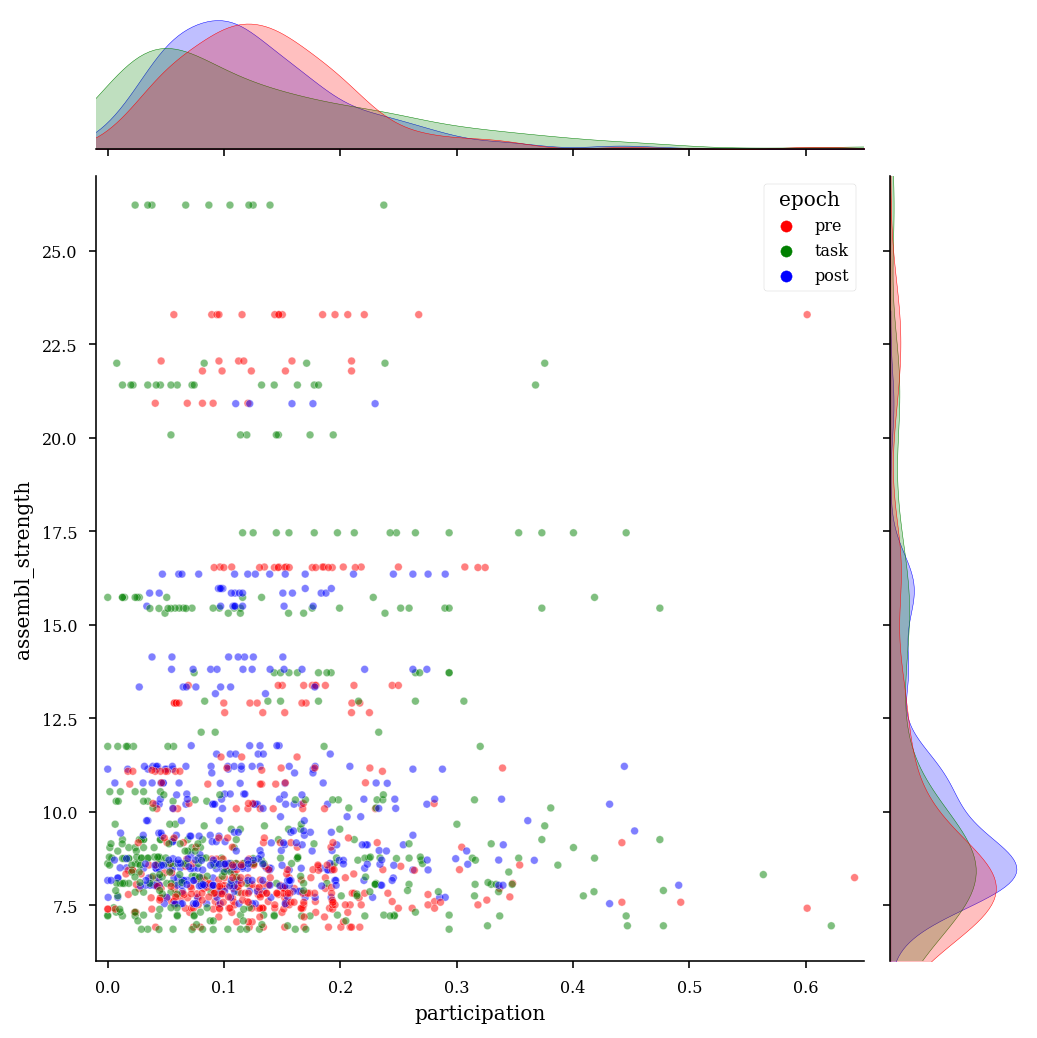

In [59]:
w,h = functions.set_size('thesis', fraction=2, subplots=(1,1))
group_colors = {"pre": 'r',
                'task': 'g',
                'post': 'b'} 
sns.set_palette(sns.color_palette(group_colors.values()))
g = sns.jointplot(
    data=par_assem_df,
    x="participation", y="assembl_strength", hue="epoch",
    height=h,s=15,alpha=.5,xlim=(-0.01,0.65),ylim=(6,27)
)
# g.set_axis_labels(xlabel='Avg. firing rate \n (task-pre)/(task+pre)', ylabel='Particip. prob. \n (post-pre)/(post+pre)')

In [60]:
import warnings
warnings.filterwarnings("ignore")

def make_df(results):
    state_dict = loading.load_SleepState_states(results['basepath'])
    nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
    wake_epochs = nel.EpochArray(state_dict['WAKEstate'])
 
    assembl_strength_all = []
    assembl_frac_all = []

    patterns = results['patterns_inside_ripples']
    patterns_keep,is_member_keep,keep_idx,is_member = functions.find_sig_assemblies(patterns)

    for i,ep in enumerate(results['assembly_act_inside_ripples']):
        if (i == 0 )| (i == 2):
            ep = ep[nrem_epochs] 
        elif i == 1:
            ep = ep[wake_epochs] 

        assembl_strength = []
        assembl_frac = []
        for ripple in ep:
            curr_assembl = ripple.data[keep_idx,:]
            # Assembly strength during SPW-R periods
            assembl_strength.append(np.nanmedian(curr_assembl.max(axis=1)[curr_assembl.max(axis=1) > 5]))
            # fraction of active assemblies active during SPW-R 
            assembl_frac.append(sum(curr_assembl.max(axis=1) > 5) / curr_assembl.shape[0])

        assembl_strength_all.append(assembl_strength)
        assembl_frac_all.append(assembl_frac)

    assemb_df = pd.DataFrame()

    for i in range(3):
        df1 = pd.DataFrame()
        df1['assembl_strength'] = assembl_strength_all[i]
        df1['assembl_frac'] = assembl_frac_all[i]
        df1['epoch'] = str(i)

        assemb_df = assemb_df.append(df1,ignore_index=True)
    return assemb_df

sessions = glob.glob(save_path +os.sep+ '*.pkl')
assemb_df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    temp_df = make_df(results)
    temp_df['basepath'] = results['basepath']
    assemb_df = assemb_df.append(temp_df,ignore_index=True)

assemb_df['assembl_strength_log'] = np.log10(assemb_df.assembl_strength)


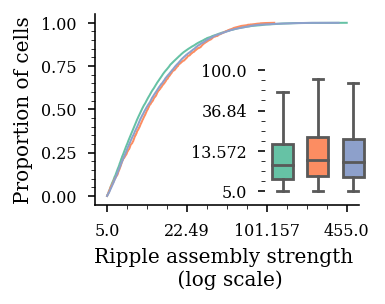

In [61]:
import custom_plots

fig = plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1.2, 1)))

# group_colors = {'0':'#fff7ec','1':'#fc8d59','2':'#7f0000'}
# group_colors = {'0':'#a6bddb','1':'#3690c0','2':'#045a8d'}
cmap = matplotlib.cm.get_cmap('Set2',3)
cmap = matplotlib.cm.get_cmap('Set2',8)

group_colors = {'0':cmap(0),'1':cmap(1),'2':cmap(2)}

# group_colors = {'0':'#a6bddb','1':'#02818a','2':'#014636'}

ax = plt.gca()
idx = ~np.isnan(assemb_df.assembl_strength)
custom_plots.plot_ecdf('assembl_strength_log',assemb_df[idx],'epoch','0',ax,group_colors)
custom_plots.plot_ecdf('assembl_strength_log',assemb_df[idx],'epoch','1',ax,group_colors)
custom_plots.plot_ecdf('assembl_strength_log',assemb_df[idx],'epoch','2',ax,group_colors)

ax2 = custom_plots.plot_box(assemb_df,'epoch','assembl_strength_log',ax,fig,group_colors,x_offset=.5,showfliers=False)

custom_plots.restore_natural_scale(ax,np.log10(5),np.log10(455),n_steps=4,x_axis=True,y_axis=False)
custom_plots.restore_natural_scale(ax2,np.log10(5),np.log10(100),n_steps=4,x_axis=False,y_axis=True)

ax.set_ylabel('Proportion of cells')
ax.set_xlabel('Ripple assembly strength \n (log scale)')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'activation_strength_pre_task_post.svg'),dpi=300,bbox_inches='tight')

In [71]:
assemb_df

,assembl_strength,assembl_frac,epoch,basepath,assembl_strength_log
0,53.371889,0.05,0,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1.727313
1,287.468942,0.05,0,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,2.458591
2,NaN,0.00,0,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,NaN
3,39.704466,0.10,0,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,1.598839
4,5.676412,0.05,0,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,0.754074
...,...,...,...,...,...
56278,NaN,0.00,2,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,NaN
56279,NaN,0.00,2,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,NaN
56280,NaN,0.00,2,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,NaN
56281,NaN,0.00,2,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,NaN


# Testing below

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def make_df(results):
    state_dict = loading.load_SleepState_states(results['basepath'])
    nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
    wake_epochs = nel.EpochArray(state_dict['WAKEstate'])
 
    assembl_strength_all = []
    assembl_frac_all = []

    patterns = results['patterns_inside_ripples']
    patterns_keep,is_member_keep,keep_idx,is_member = functions.find_sig_assemblies(patterns)

    for i,ep in enumerate(results['assembly_act_inside_ripples']):
        if (i == 0 )| (i == 2):
            ep = ep[nrem_epochs] 
        elif i == 1:
            ep = ep[wake_epochs] 

        assembl_strength = []
        assembl_frac = []
        for ripple in ep:
            curr_assembl = ripple.data[keep_idx,:]
            # Assembly strength during SPW-R periods
            assembl_strength.append(np.nanmedian(curr_assembl.max(axis=1)[curr_assembl.max(axis=1) > 5]))
            # fraction of active assemblies active during SPW-R 
            assembl_frac.append(sum(curr_assembl.max(axis=1) > 5) / curr_assembl.shape[0])

        assembl_strength_all.append(assembl_strength)
        assembl_frac_all.append(assembl_frac)

    assemb_df = pd.DataFrame()

    for i in range(3):
        df1 = pd.DataFrame()
        df1['assembl_strength'] = assembl_strength_all[i]
        df1['assembl_frac'] = assembl_frac_all[i]
        df1['epoch'] = i

        assemb_df = assemb_df.append(df1,ignore_index=True)
    return assemb_df

sessions = glob.glob(save_path +os.sep+ '*.pkl')
assemb_df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    temp_df = make_df(results)
    temp_df['basepath'] = results['basepath']
    assemb_df = assemb_df.append(temp_df,ignore_index=True)

In [15]:
# prob_deep = []
# prob_sup = []
rel_prop_deep_sup = []
for n_as in df.assembly_n.unique():
    current_df = df[df.assembly_n == n_as]
    if (current_df.membership.sum() > 1) & (current_df.deepSuperficial.nunique() > 1):

        n_deep = ((current_df.deepSuperficial == "Deep") & (current_df.membership)).sum()
        n_sup = ((current_df.deepSuperficial == "Superficial") & (current_df.membership)).sum()
        rel_prop_deep_sup.append((n_sup - n_deep) / (n_deep + n_sup))
   
        # prob_deep.append(((current_df.deepSuperficial == "Deep") & (current_df.membership)).sum() / (current_df.membership).sum())
        # prob_sup.append(((current_df.deepSuperficial == "Superficial") & (current_df.membership)).sum() / (current_df.membership).sum())


In [32]:
shuff_out = []
for i_shuff in range(1000):
    labels = df['deepSuperficial'].values.copy()
    random.shuffle(labels)
    for n_as in df.assembly_n.unique():
        current_labels = labels[df.assembly_n == n_as]
        shuff_out.append((current_labels[(df[df.assembly_n == n_as].membership == True)] == "Deep").sum() / (current_labels == "Deep").sum())


In [66]:
((df[df.assembly_n == 2].deepSuperficial == 'Deep') & (df[df.assembly_n == 2].membership)).sum()

print((df.deepSuperficial == "Deep").sum())
print((df.deepSuperficial == "Superficial").sum())


print(((df.deepSuperficial == "Deep") & (df.membership)).sum())
print(((df.deepSuperficial == "Superficial") & (df.membership)).sum())


34323
17427
857
436


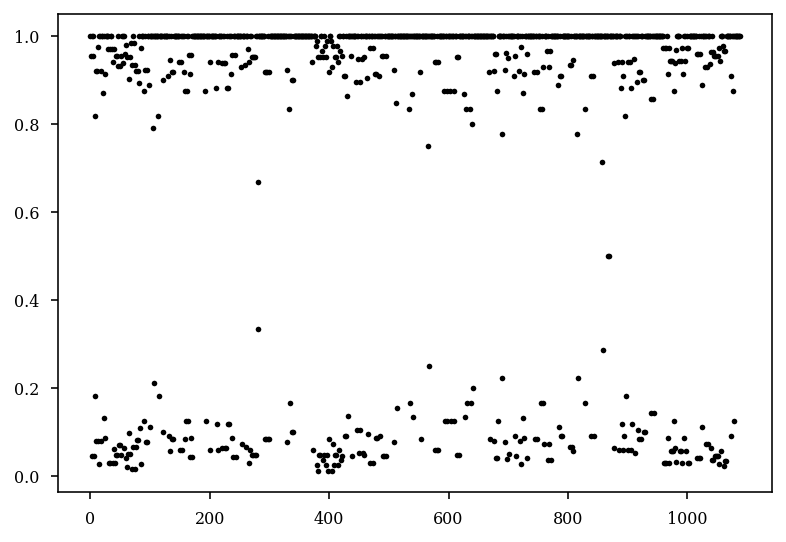

In [101]:
# from scipy.stats.contingency import margins
# print(df.groupby('deepSuperficial').membership.value_counts())
# print(df.groupby('deepSuperficial').membership.count())

# print(df.groupby('deepSuperficial').membership.value_counts() / df.groupby('deepSuperficial').membership.count())

# df.groupby(['deepSuperficial','assembly_n']).membership.count()
group_by_df = df.groupby(['deepSuperficial','assembly_n']).membership.value_counts() / df.groupby(['deepSuperficial','assembly_n']).membership.count()
# group_by_df['membership']
# df.groupby(['deepSuperficial','assembly_n']).membership.apply(lambda g: g.value_counts()/len(g))
# plt.plot(group_by_df['Deep'].values,'.k')
plt.plot(group_by_df['Superficial'].values,'.k')


<AxesSubplot:xlabel='assembly_n', ylabel='weights'>

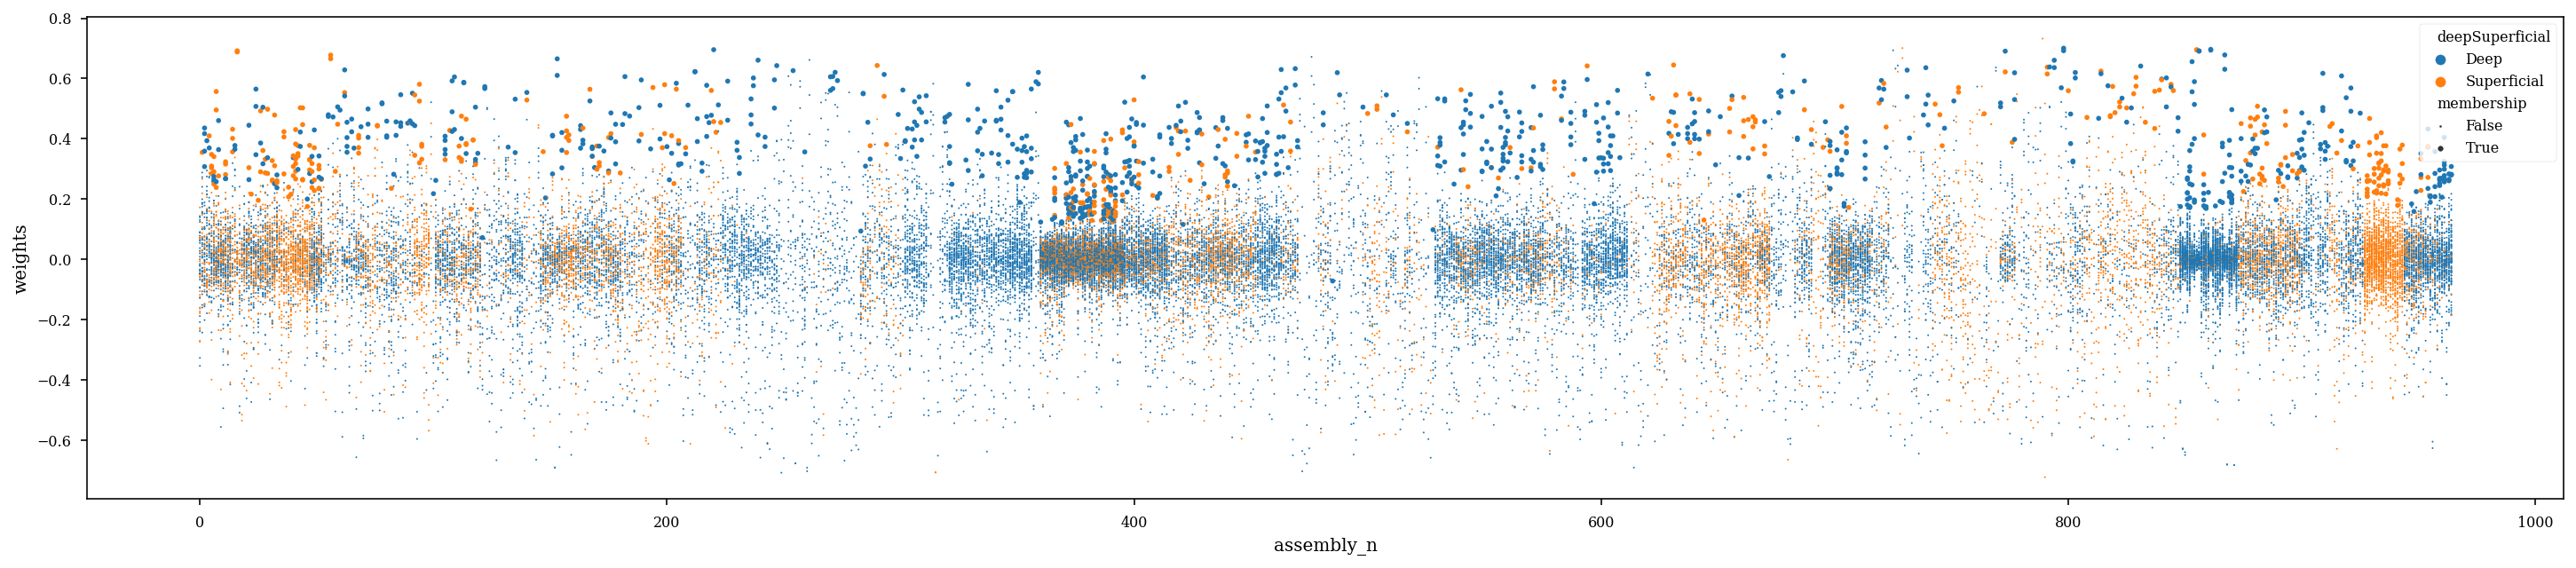

In [63]:
# plt.plot(df.assembly_n,df.weights)
plt.figure(figsize=(25,5))
sns.scatterplot(x="assembly_n", y="weights",
                hue="deepSuperficial", size="membership",
                sizes=(8, 1), linewidth=0,
                data=df)

# plt.xlim(0,100)                

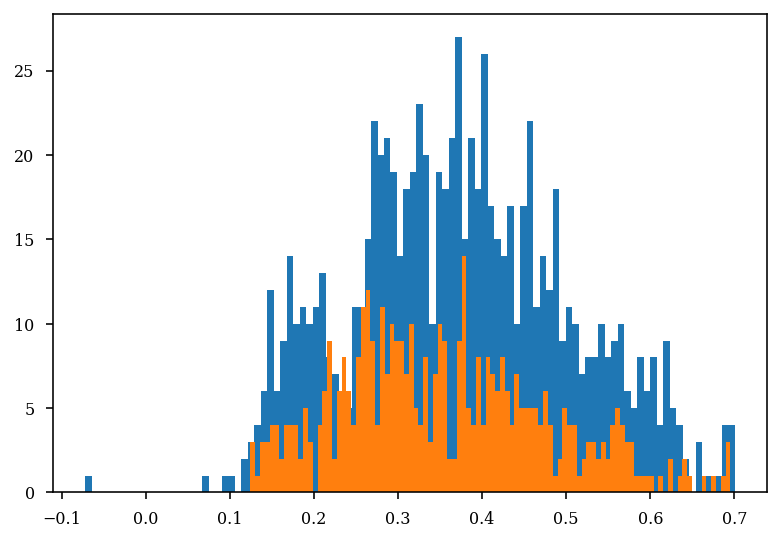

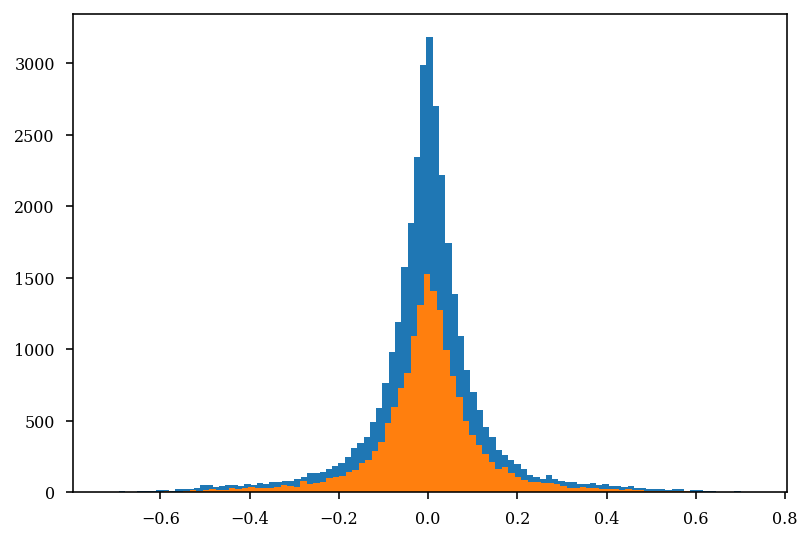

In [8]:

# sns.histplot(
#     df,
#     x="weights", hue="membership",
#     multiple="stack",
#     palette="light:m_r",
#     edgecolor=".3",
#     linewidth=.5
# )

plt.hist(df.weights[(df.membership == True) & (df.deepSuperficial == "Deep")],100)
plt.hist(df.weights[(df.membership == True) & (df.deepSuperficial == "Superficial")],100)
plt.show()

plt.hist(df.weights[(df.deepSuperficial == "Deep")],100)
plt.hist(df.weights[(df.deepSuperficial == "Superficial")],100)
plt.show()

In [35]:
def pvalue(shuff_dist,score):
        # DOI: 10.2202/1544-6115.1585
        return (sum(np.abs(shuff_dist) > np.abs(score)) + 1) /(len(shuff_dist) + 1)

def mixing_index(values):
    if isinstance(values, float):
        if values > 0.5:
            return (values * -1) + 1
    else:
        values[values > .5] = (values[values > .5] * -1) + 1
    return values

obs = []
shuff_out = []

for session in sessions:

    with open(session, 'rb') as f:
        results = pickle.load(f)

    assmbl = results['patterns_inside_ripples']
    if len(assmbl) == 0:
        continue
    thres = np.mean(assmbl,axis=1) + np.std(assmbl,axis=1)*2
    for idx in np.array((assmbl.T)>thres).T:
        if (idx.sum() == 0) | (idx.sum() == 1):
            continue
        
        labels = results['deepSuperficial'].values.copy()
        # print(labels[idx],sum(labels[idx] == "Deep") / idx.sum())
        obs.append(sum(labels[idx] == "Deep") / idx.sum())
        # obs = mixing_index(obs)

        for i_shuff in range(1000):
            labels = results['deepSuperficial'].values.copy()
            random.shuffle(labels)
            shuff_out.append(sum(labels[idx] == "Deep") / idx.sum())
        # shuff_out = mixing_index(np.array(shuff_out))   

        # plt.figure()
        # plt.hist(shuff_out)  
        # plt.title(pvalue(shuff_out,obs))
        # plt.axvline(obs,color='r')  


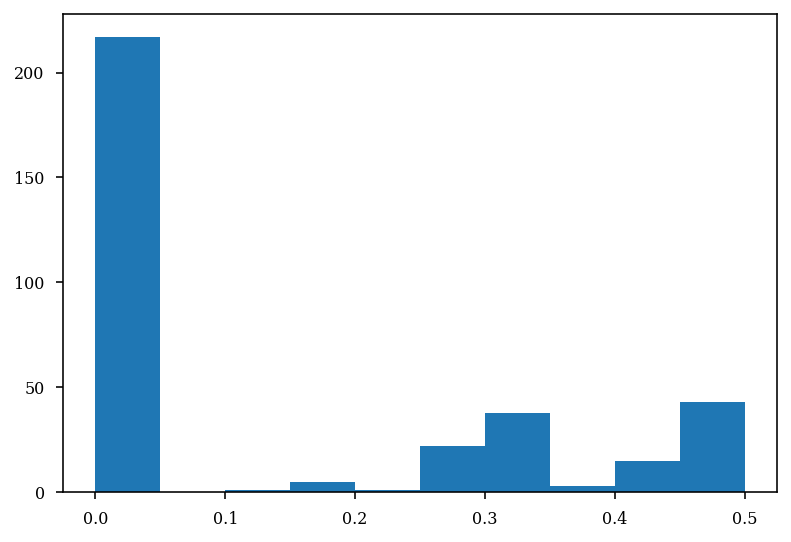

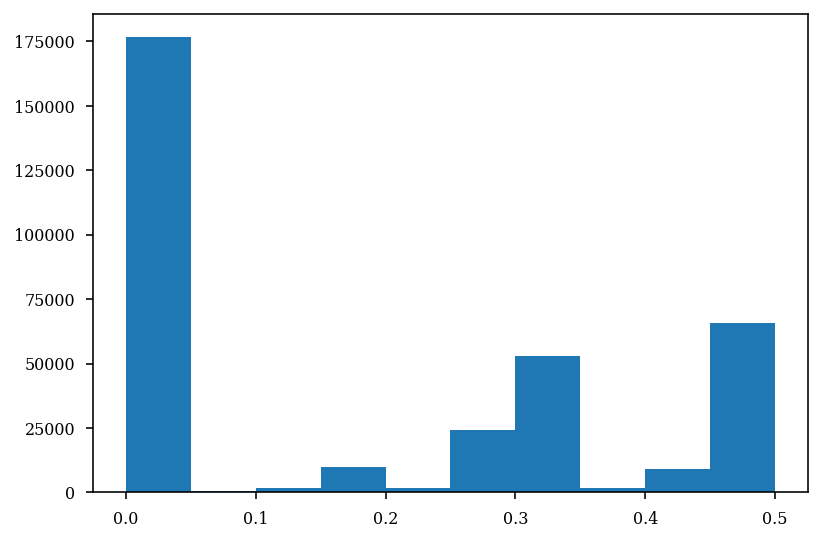

In [44]:
plt.hist(mixing_index(np.array(obs)))
plt.show()
plt.hist(mixing_index(np.array(shuff_out)))
plt.show()

In [33]:
import random

# assmbl = results['patterns_inside_ripples']
# thres = np.mean(assmbl,axis=1) + np.std(assmbl,axis=1)*2

# for idx in np.array((assmbl.T)>thres).T:
#     sum(results['deepSuperficial'][idx].values == "Deep") / idx.sum()

shuff_out = []
obs = []
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    assmbl = results['patterns_inside_ripples']
    if len(assmbl) == 0:
        continue
    thres = np.mean(assmbl,axis=1) + np.std(assmbl,axis=1)*2

    # labels = results['deepSuperficial'].values.copy()

    obs.append(sum(labels[idx] == "Deep") / idx.sum())

    for i_shuff in range(1000):
        for idx in np.array((assmbl.T)>thres).T:
            if (idx.sum() == 0) | (idx.sum() == 1):
                continue
            labels = results['deepSuperficial'].values.copy()
            random.shuffle(labels)

            shuff_out.append(sum(labels[idx] == "Deep") / idx.sum())
shuff_out = np.hstack(shuff_out)


In [99]:
shuff_out[shuff_out > .5] = (shuff_out[shuff_out > .5] *-1) + 1

In [22]:
assmbl = results['patterns_inside_ripples']

thres = np.mean(assmbl,axis=1) + np.std(assmbl,axis=1)*2
# plt.imshow((assmbl.T))
# plt.show()
# plt.imshow((assmbl.T)>thres)
for idx in np.array((assmbl.T)>thres).T:
    print(results['deepSuperficial'][idx].values)

[]
['Superficial']
['Deep' 'Deep' 'Deep' 'Deep']
['Deep']
['Superficial' 'Deep']
['Superficial' 'Superficial' 'Superficial' 'Superficial']


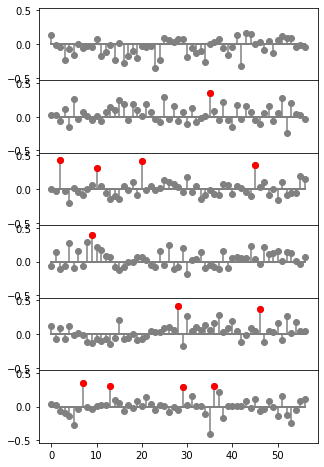

In [124]:
# results['patterns_outside_ripples'].shape
# results['patterns_inside_ripples'].shape
# sns.heatmap(results['patterns_outside_ripples'])
# plt.show()
# sns.heatmap(results['patterns_inside_ripples'])
group_colors = {"deep": '#7b3294',
            "deep_non_member": '#c2a5cf',
            'sup': '#008837',
            'sup_non_member': '#a6dba0'} 

def plot_lolipop(patterns,colors):
    fig, axs = plt.subplots(patterns.shape[0],1, figsize=(5, 8), edgecolor='k')
    fig.subplots_adjust(hspace = 0.00, wspace=0)
    axs = axs.ravel()

    for i,assmbl in enumerate(patterns):
        markerline, stemlines, baseline = axs[i].stem(np.arange(len(assmbl)),assmbl,linefmt='grey')
        markerline.set_markerfacecolor('grey')
        markerline.set_markeredgecolor('grey')
        plt.setp(baseline, color='grey', linewidth=2,zorder=-100)
        thres = np.mean(assmbl) + np.std(assmbl)*2
        idx = assmbl > thres
        axs[i].scatter(np.arange(len(assmbl))[idx],assmbl[idx],color='red',zorder=1000)



    for i in range(patterns.shape[0]):
        axs[i].set_ylim(-patterns.max()-.1,patterns.max()+.1)
        # axs[i].axis('off')

plot_lolipop(results['patterns_inside_ripples'],colors)        
# plot_lolipop(results['patterns_outside_ripples']) 
# plt.gca().invert_yaxis()

In [120]:



# get smooth vector-function containing each neuron's z-scored instantaneous FR
z_t, ts = get_z_t(st)

In [121]:
patterns, significance, zactmat = assembly.runPatterns(binned_st.data)
assemblyAct = assembly.computeAssemblyActivity(patterns, z_t)

In [122]:
assembly_act = nel.AnalogSignalArray(data=assemblyAct,timestamps=ts,fs=1000)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AxesSubplot:>

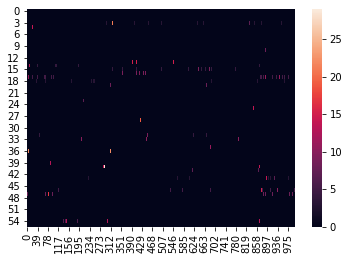

In [123]:
sns.heatmap(zactmat[:,0:1000])

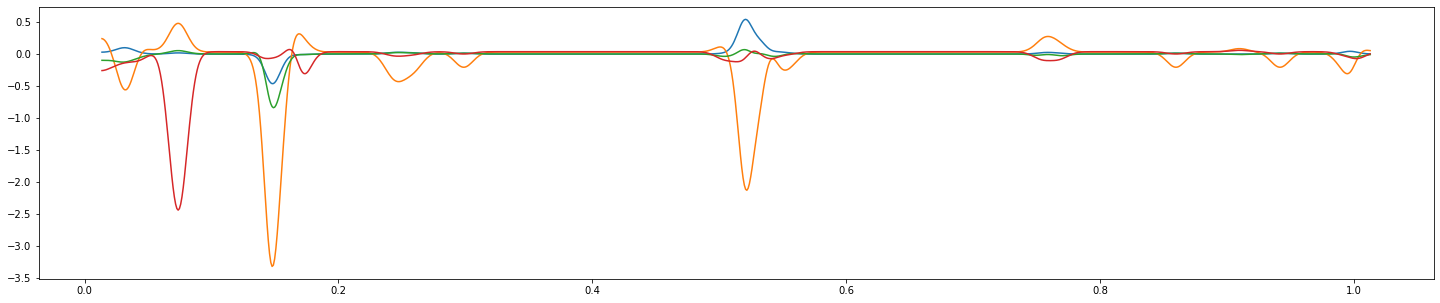

In [124]:
plt.figure(figsize=(25,5))
plt.plot(ts[0:1000],assemblyAct[0,0:1000])
plt.plot(ts[0:1000],assemblyAct[1,0:1000])
plt.plot(ts[0:1000],assemblyAct[2,0:1000])
plt.plot(ts[0:1000],assemblyAct[3,0:1000])
plt.show()

In [ ]:
rip_n = 4
cmap = matplotlib.cm.get_cmap('tab20b',patterns.shape[0])

plt.plot(assembly_act[ripple_epochs[rip_n]].abscissa_vals ,assembly_act[ripple_epochs[rip_n]].data.T,cmap=cmap)
plt.show()
# plt.eventplot(st[ripple_epochs[4]].data)
# plt.show()

import matplotlib


thres = patterns.mean(axis=1) + patterns.std(axis=1)
temp_pattens = patterns.copy()
temp_pattens[patterns <  thres[:,np.newaxis]] = 0
assmbl_unit_id = temp_pattens.argmax(axis=0)

axs = plt.gca()
color_idx = 0
for i,unit_id in enumerate(pd.unique(assmbl_unit_id)):
    npl.rasterplot(st[ripple_epochs[rip_n]][:,np.where(assmbl_unit_id == unit_id)[0]+1],color=cmap(color_idx), lw=2, lh=1, ax=axs, vertstack=True)
    axs.plot(assembly_act[ripple_epochs[rip_n]].abscissa_vals,assembly_act[ripple_epochs[rip_n]].data[unit_id,:]+10*i, color=cmap(color_idx),linewidth=.75,zorder=1000-i,alpha=1)
    color_idx+=1

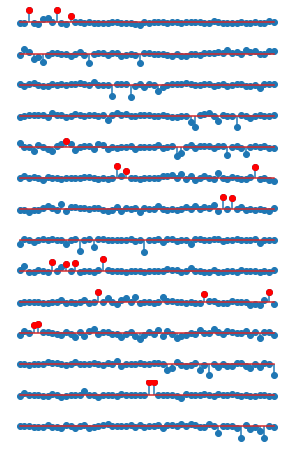

In [125]:
fig, axs = plt.subplots(patterns.shape[0],1, figsize=(5, 8), edgecolor='k')
fig.subplots_adjust(hspace = 0.00, wspace=0)
axs = axs.ravel()

for i,assmbl in enumerate(patterns):
    axs[i].stem(np.arange(len(assmbl)),assmbl)
    thres = np.mean(assmbl) + np.std(assmbl)*2
    idx = assmbl > thres
    axs[i].scatter(np.arange(len(assmbl))[idx],assmbl[idx],color='red',zorder=1000)
    
for i in range(patterns.shape[0]):
    axs[i].set_ylim(-patterns.max()-.1,patterns.max()+.1)
    axs[i].axis('off')

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


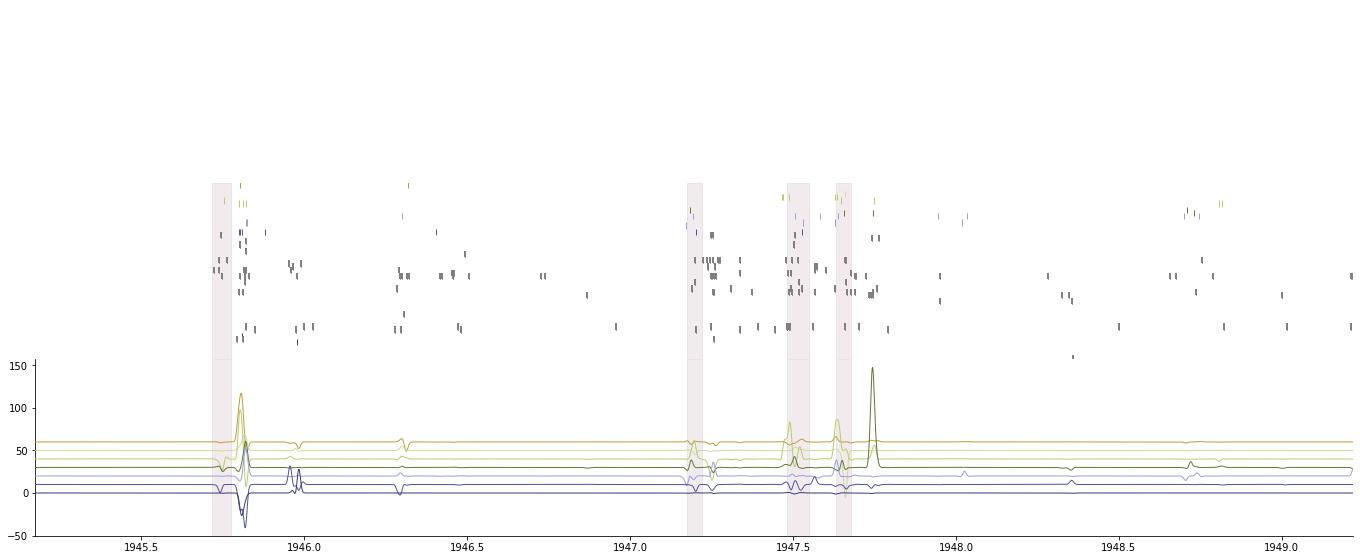

In [136]:
def plot_assembl_strength(st,patterns,assembly_act,interval,axs,show_not_in_assmbl=True,vertstack=True):
    
    cmap = matplotlib.cm.get_cmap('tab20b',patterns.shape[0])

    interval = nel.EpochArray(interval)
    st = st[interval]

    assembly_act = assembly_act[interval]
    
    thres = patterns.mean(axis=1) + patterns.std(axis=1)*2
    temp_pattens = patterns.copy()
    temp_pattens[patterns <  thres[:,np.newaxis]] = 0
    assmbl_unit_id = temp_pattens.argmax(axis=0)
    
    color_idx = 0
    for i,unit_id in enumerate(pd.unique(assmbl_unit_id)):
        npl.rasterplot(st[:,np.where(assmbl_unit_id == unit_id)[0]+1],color=cmap(color_idx), lw=1, lh=2, ax=axs[1], vertstack=vertstack)
        axs[2].plot(assembly_act.abscissa_vals,assembly_act.data[unit_id,:]+10*i, color=cmap(color_idx),linewidth=1,zorder=1000-i,alpha=1,label='assembly:'+str(unit_id))
        color_idx+=1
        
    npl.rasterplot(st[:,np.where(temp_pattens.max(axis=0) == 0)[0]+1],color='grey', lw=2, lh=2, ax=axs[1], vertstack=True)

    axs[1].set_xlim(interval.data[0][0],interval.data[0][1])
    axs[2].set_xlim(interval.data[0][0],interval.data[0][1])
    axs[1].axis('off')
    axs[2].spines["right"].set_visible(False)
    axs[2].spines["top"].set_visible(False)

fig, axs = plt.subplots(3,1, figsize=functions.set_size('thesis', fraction=4, subplots=(2, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0)
axs = axs.ravel()  

rip_n = 201
interval = [ripple_epochs[rip_n].start-2, ripple_epochs[rip_n].stop+2]

plot_assembl_strength(st,patterns,assembly_act,interval,axs,show_not_in_assmbl=False,vertstack=True)

axs[0].axis('off')

for item in ripples[ripples['peaks'].between(interval[0], interval[1])].itertuples():
    axs[1].axvspan(item.start, item.stop, alpha=0.1, color='#843b62', zorder=-2000)
    axs[2].axvspan(item.start, item.stop, alpha=0.1, color='#843b62', zorder=-2000)

# axs[2].legend()

In [ ]:
assembl_strength = []
assembl_frac = []

for ripple in ripples.itertuples():
    # pull out current assembly based on ripple width
    curr_assembl = assemblyAct[:,(ts >= ripple.start_time) & (ts <= ripple.end_time)]
    # Assembly strength during SPW-R periods
    assembl_strength.append(np.median(curr_assembl.max(axis=0)[curr_assembl.max(axis=0) > 5]))
    
    # fraction of active assemblies active during SPW-R 
    assembl_frac.append(sum(np.any(curr_assembl > 5,axis=1)) / curr_assembl.shape[0])

n_assembl = (patterns.shape[0])
n_units = (patterns.shape[1])
n_assembl_n_cell_frac = (patterns.shape[0]/patterns.shape[1])    

# number of cells that contribute significantly (>2 SD) to each assembly     
n_cells_per_assembl_ = np.sum(patterns > (patterns.mean(axis=1) + patterns.std(axis=1)*2)[:, np.newaxis],axis=1)
n_cells_per_assembl = (n_cells_per_assembl_[n_cells_per_assembl_ > 0].mean())  